# Project 287 - Business objective
The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention 
---

## 1. Import Libraries

In [2]:
# spaCy
! python -m spacy download en_core_web_sm

# nltk
! python -m nltk.downloader stopwords
! python -m nltk.downloader punkt
! python -m nltk.downloader averaged_perceptron_tagger
! python -m nltk.downloader universal_tagset
! python -m nltk.downloader wordnet
! python -m nltk.downloader brown
! python -m nltk.downloader maxent_ne_chunker

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 163.4 kB/s eta 0:01:19
     --------------------------------------- 0.1/12.8 MB 261.4 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 261.4 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 275.8 kB/s eta 0:00:47
     --------------------------------------- 0.1/12.8 MB 275.8 kB/s eta 0:00:47
     --------------------------------------- 0.2/12.8 MB 378.3 kB/s eta 0:00:34
     --------------------------------------- 0.2/12.8 MB 378.3 kB/s eta 0:00:34
      -------------------------------------- 0.3/12.8 MB 501.4 kB/s eta 0:00:25
      -------------------------------------- 0.3/12.8 MB

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execu

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import win32com.client
import PyPDF2
from docx import Document

In [2]:
import string
# import spacy
import nltk
import re
import string

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import word_tokenize

from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2.	Load and Check Data

In [5]:
# Define the directory path
directory = "D:\\DATA SCIENCE\\DS EXCELR\\INTERNSHIP\\PROJECT 3 RESUME CLASSIFICATION\\P287\\Resumes"

# Create a COM object to interact with Word
word = win32com.client.Dispatch("Word.Application")

# Initialize empty lists to store data
categories = []
resumes = []

# Walk through the directory and its subfolders
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith((".doc", ".docx", ".pdf")):
            # Get the category (subfolder name)
            category = os.path.basename(root)
            if category == 'Resumes':
                category = 'React Developer'
            elif category == 'workday resumes':
                category = 'Workday resumes'
            elif category == 'SQL Developer Lightning insight':
                category = 'SQL Developer'
                
            
            # Get the full path to the file
            file_path = os.path.join(root, filename)
            
            # Read .docx files
            if filename.endswith(".docx"):
                doc = Document(file_path)
                text = "\n".join([para.text for para in doc.paragraphs])
            
            # Read .doc files
            elif filename.endswith(".doc"):

                doc = word.Documents.Open(file_path)
                text = doc.Content.Text
                doc.Close()
                
            # Read .pdf files
            elif filename.endswith(".pdf"):
                pdf_text = ""
                with open(file_path, "rb") as pdf_file:
                    pdf_reader = PyPDF2.PdfReader(pdf_file)
                    for page_num in range(len(pdf_reader.pages)):
                        page = pdf_reader.pages[page_num]
                        pdf_text += page.extract_text()
                
                text = pdf_text
            
            # Append data to the lists
            categories.append(category)
            resumes.append(text)

word.Quit()

# Create a DataFrame
df = pd.DataFrame({'category': categories, 'resume': resumes})

# Display the DataFrame
print(df)

           category                                             resume
0   React Developer  Name: Ravali P \n\n                           ...
1   React Developer    \nSUSOVAN  BAG   \nSeeking  a  challenging  ...
2   React Developer  Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...
3   React Developer  HARIPRIYA BATTINA \nExperience as UI Developer...
4   React Developer  KAMALAKAR REDDY. A \nLinked In: https://www.li...
..              ...                                                ...
74  Workday resumes  \tWorkday Integration Consultant\r\rName      ...
75  Workday resumes  Seeking suitable positions in Workday HCM  as ...
76  Workday resumes  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...
77  Workday resumes  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
78  Workday resumes                                                ...

[79 rows x 2 columns]


In [6]:
df.head()

category                                             resume
0  React Developer  Name: Ravali P \n\n                           ...
1  React Developer    \nSUSOVAN  BAG   \nSeeking  a  challenging  ...
2  React Developer  Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...
3  React Developer  HARIPRIYA BATTINA \nExperience as UI Developer...
4  React Developer  KAMALAKAR REDDY. A \nLinked In: https://www.li...

In [7]:
df.tail()

category                                             resume
74  Workday resumes  \tWorkday Integration Consultant\r\rName      ...
75  Workday resumes  Seeking suitable positions in Workday HCM  as ...
76  Workday resumes  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...
77  Workday resumes  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
78  Workday resumes                                                ...

In [8]:
df.shape

(79, 2)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

category    0
resume      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  79 non-null     object
 1   resume    79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [12]:
df.describe()

category                                             resume
count                79                                                 79
unique                4                                                 79
top     React Developer  Name: Ravali P \n\n                           ...
freq                 24                                                  1

In [13]:
df.resume.iloc[1]

'  \nSUSOVAN  BAG   \nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n  \nSKILLS  \nCCNA -   Routing  &  Switching  subnetting  \nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n  \nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n  \nSOFT  SKILLS  \n\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n   \nLANGUAGES  \n\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n  \n  \nPROJECTS   \n  \nSMART  AGRICULTURE   \nBuilt  a  product  for  farmers  using  IoT  as  a  solution     \nAUTOMATIC  WATER  MOTOR  CONTROLLER  (2019 -   2020)    \nIoT,  android  and  API  technologies  combined  to  automate  work  of  water  motor  controllers  u

## 3. Visualization

### 1. Count & Percentage of different Resumes

category
React Developer       24
Workday resumes       21
Peoplesoft resumes    20
SQL Developer         14
Name: count, dtype: int64


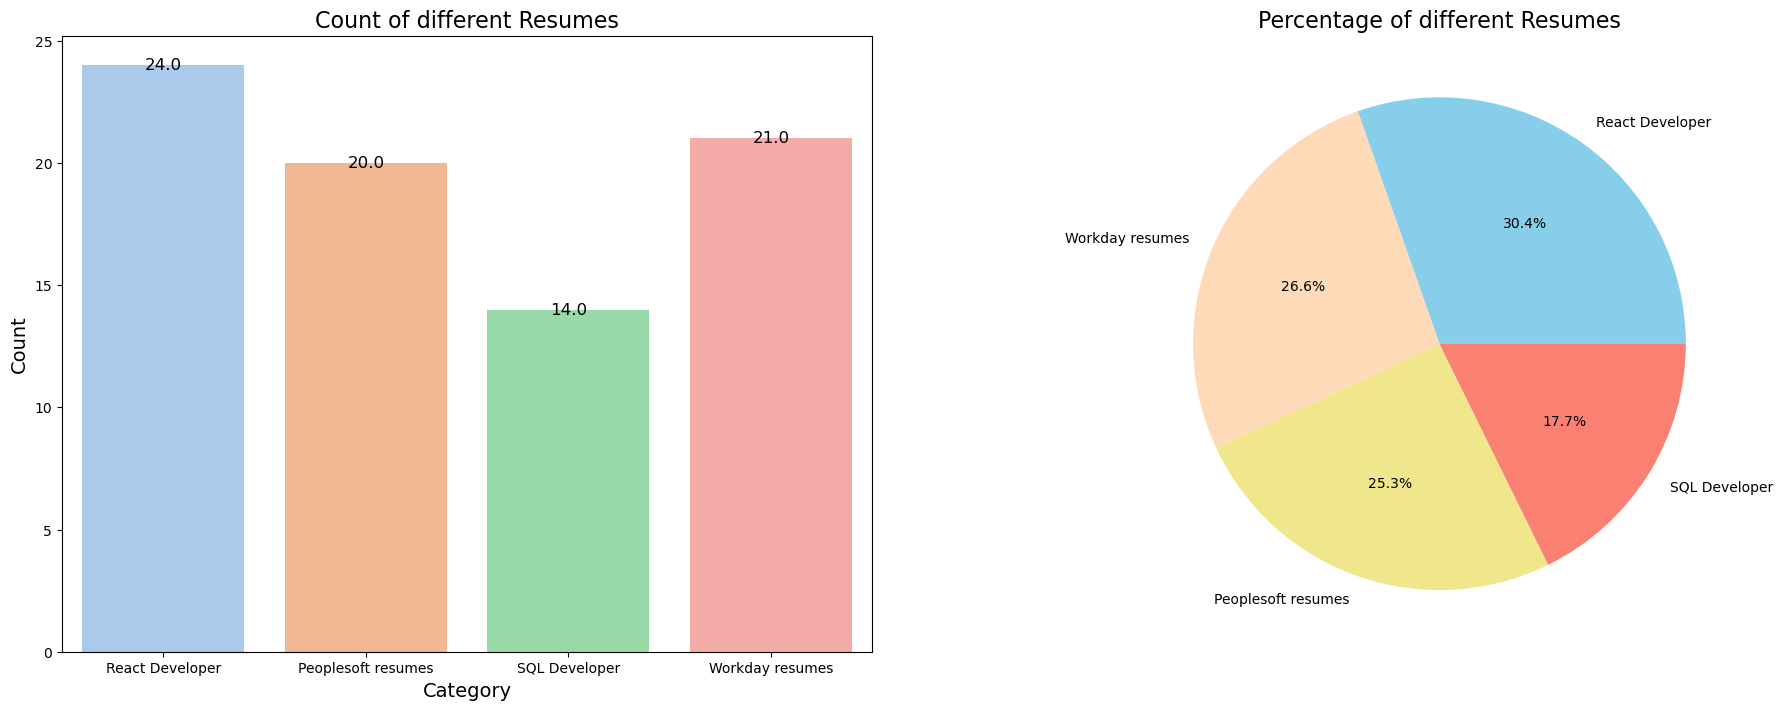

In [14]:
print(df["category"].value_counts())

fig, ax = plt.subplots(1, 2, figsize=(23, 8))

# Count plot
g1 = sns.countplot(x="category", data=df, ax=ax[0], palette="pastel")
g1.set_title("Count of different Resumes", fontsize=16)
g1.set_ylabel("Count", fontsize=14)
g1.set_xlabel("Category", fontsize=14)
for p in g1.patches:
    g1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12)


# Define the explode list (one category exploded, the rest not)
explode = [0.1 if category == "workday resumes" else 0 for category in df["category"].value_counts().index]

# Pie chart
g2 = ax[1].pie(df["category"].value_counts().values,
               explode=explode,  # Use the defined explode list
               labels=df.category.value_counts().index,
               autopct='%1.1f%%',
               colors=['SkyBlue', 'PeachPuff', 'khaki', 'Salmon'])
ax[1].set_title("Percentage of different Resumes", fontsize=16)
# ax[1].legend(df.category.value_counts().index, loc= "upper left", bbox_to_anchor= (0.85, 0.85), fontsize=12) # Set legend fontsize

plt.show()

### 2. Distribution of the resume accoring to category

In [15]:
# Create a new DataFrame with the index as a column
df['S/no'] = df.index

In [16]:
df.set_index("S/no", inplace=True)

In [17]:
df.head(2)

category                                             resume
S/no                                                                    
0     React Developer  Name: Ravali P \n\n                           ...
1     React Developer    \nSUSOVAN  BAG   \nSeeking  a  challenging  ...

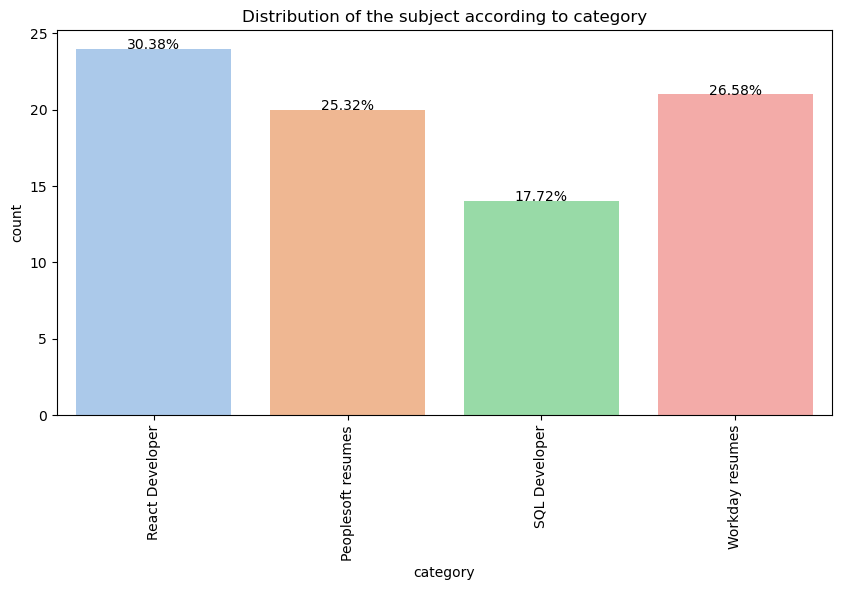

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed

ax = sns.countplot(x="category", data=df, palette="pastel")
plt.title("Distribution of the subject according to category")

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add percentage labels on top of the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()


##  4. Data Cleaning

In [19]:
first_text =df.resume[10] # This line extracts the value from the 'text' column of the DataFrame 'df' at index 10 (assuming the DataFrame has a column named 'text'). The value at index 10 is assigned to the variable 'first_text.'
first_text

"Maryala Vinay Reddy\r\rProfessional Summary:\t\r\rHaving 2 years of successful IT experience in all phases of Software Development Life Cycle (SDLC) as a React.JS Developer and JavaScript.\r\rProfessional Experience:\rExperience in design and configuration for implementation, development, maintenance and support as a React.JS Developer to meet business needs. \rGood working knowledge on React Hooks, JavaScript, HTML.\rDeveloping new user-facing features using React.js\rBuilding reusable components and front-end libraries for future use.\rStrong proficiency in JavaScript, including DOM manipulation.\rThorough understanding of React.js and its core principles\rFamiliarity with newer specifications of ECMA Script\rA proactive learner for adopting emerging trends and addressing industry requirements to achieve the organizational objectives.\rGood communication, presentation and interpersonal skills.\r\rProject Experience:\r\rPROJECT :1\r\rTitle                           : simplify Applica

### I.	Removal of HTML Contents
•	HTML tags, if present, are removed from the text data.

In [20]:
from bs4 import BeautifulSoup # This line imports the BeautifulSoup class from the bs4 library. BeautifulSoup is a popular library used for parsing HTML and XML documents.

soup = BeautifulSoup(first_text, "html.parser") # This line creates a BeautifulSoup object named soup. It takes two arguments: the HTML content to parse (first_text) and the parser to use ("html.parser" in this case). The parser is used to convert the HTML content into a structured parse tree that makes it easy to navigate and extract data.
first_text= soup.get_text() # This line extracts the text content from the soup object and stores it back in the variable first_text. The get_text() method is used to get the plain text from the parsed HTML, excluding any HTML tags or markup.
first_text # This line likely prints or outputs the value of the variable first_text after extracting the text content from the HTML. The output will be the text without any HTML tags or markup, only the plain text content that was present in the original first_text.

"Maryala Vinay Reddy\r\rProfessional Summary:\t\r\rHaving 2 years of successful IT experience in all phases of Software Development Life Cycle (SDLC) as a React.JS Developer and JavaScript.\r\rProfessional Experience:\rExperience in design and configuration for implementation, development, maintenance and support as a React.JS Developer to meet business needs. \rGood working knowledge on React Hooks, JavaScript, HTML.\rDeveloping new user-facing features using React.js\rBuilding reusable components and front-end libraries for future use.\rStrong proficiency in JavaScript, including DOM manipulation.\rThorough understanding of React.js and its core principles\rFamiliarity with newer specifications of ECMA Script\rA proactive learner for adopting emerging trends and addressing industry requirements to achieve the organizational objectives.\rGood communication, presentation and interpersonal skills.\r\rProject Experience:\r\rPROJECT :1\r\rTitle                           : simplify Applica

### II.	Removal of Punctuation Marks and Special Characters
•	Punctuation marks and special characters are removed from the text data except uppercase/lowercase letters using Regular Expressions

In [21]:
print(first_text)

                                                                                                                                      Vinay Reddy     should register through signup page and login and order the raw materials. And who wants menu and what is Healthy Chef Creations just they can open the home page and see their details.


In [22]:
first_text= re.sub('\[[^]]*\]', ' ', first_text) # uses the re.sub() function to remove any text enclosed in square brackets and replace it with a space. The regular expression '\[[^]]*\]' matches any text that is enclosed in square brackets, and the re.sub() function replaces it with a single space. This step is likely used to remove any text that appears within square brackets, such as references, citations, or annotations.
first_text= re.sub('\[^a-zA-Z]', ' ', first_text) # uses the re.sub() function to replace any non-alphabetic characters with spaces. The regular expression [^a-zA-Z] matches any character that is not an uppercase or lowercase letter. The re.sub() function replaces such non-alphabetic characters with spaces. This step is likely used to eliminate special characters, punctuation, numbers, or other symbols from the text, so only alphabetic characters remain.
first_text= first_text.lower() # converts all the remaining text in first_text from uppercase to lowercase. This step is often taken to standardize the text and avoid case sensitivity during further analysis or processing.
first_text # This line likely prints or outputs the value of the variable first_text after the above preprocessing steps have been applied. The output will be the cleaned and lowercased text, which has been processed to remove text in square brackets and replace non-alphabetic characters with spaces.

"maryala vinay reddy\r\rprofessional summary:\t\r\rhaving 2 years of successful it experience in all phases of software development life cycle (sdlc) as a react.js developer and javascript.\r\rprofessional experience:\rexperience in design and configuration for implementation, development, maintenance and support as a react.js developer to meet business needs. \rgood working knowledge on react hooks, javascript, html.\rdeveloping new user-facing features using react.js\rbuilding reusable components and front-end libraries for future use.\rstrong proficiency in javascript, including dom manipulation.\rthorough understanding of react.js and its core principles\rfamiliarity with newer specifications of ecma script\ra proactive learner for adopting emerging trends and addressing industry requirements to achieve the organizational objectives.\rgood communication, presentation and interpersonal skills.\r\rproject experience:\r\rproject :1\r\rtitle                           : simplify applica

### III.	Removal of Stopwords
•	Commonly occurring words with little or no significance (stopwords) are removed from the text data like is, a, the...

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download("stopwords") # downloads the set of stopwords from the nltk library. Stopwords are common words (e.g., "the," "is," "and") that are often removed from text during text analysis or natural language processing tasks because they do not carry much meaning on their own.
from nltk.corpus import stopwords # imports the 'stopwords' corpus from the nltk library. The 'stopwords' corpus contains a list of common stopwords for various languages.

# we can use tokenize instead of split
first_text= nltk.word_tokenize(first_text) # tokenizes the text in the first_text variable. Tokenization is the process of breaking a text into individual words or tokens. The nltk.word_tokenize() function is used for this purpose. It takes a string of text (first_text) as input and returns a list of tokens (words) from the text.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
first_text= [word for word in first_text if not word in set(stopwords.words("english"))]

In [26]:
print(first_text)

['maryala', 'vinay', 'reddy', 'professional', 'summary', ':', '2', 'years', 'successful', 'experience', 'phases', 'software', 'development', 'life', 'cycle', '(', 'sdlc', ')', 'react.js', 'developer', 'javascript', '.', 'professional', 'experience', ':', 'experience', 'design', 'configuration', 'implementation', ',', 'development', ',', 'maintenance', 'support', 'react.js', 'developer', 'meet', 'business', 'needs', '.', 'good', 'working', 'knowledge', 'react', 'hooks', ',', 'javascript', ',', 'html', '.', 'developing', 'new', 'user-facing', 'features', 'using', 'react.js', 'building', 'reusable', 'components', 'front-end', 'libraries', 'future', 'use', '.', 'strong', 'proficiency', 'javascript', ',', 'including', 'dom', 'manipulation', '.', 'thorough', 'understanding', 'react.js', 'core', 'principles', 'familiarity', 'newer', 'specifications', 'ecma', 'script', 'proactive', 'learner', 'adopting', 'emerging', 'trends', 'addressing', 'industry', 'requirements', 'achieve', 'organizational

### IV.	Lemmatization
•	Words are reduced to their base or root form using lemmatization techniques. To bring back multiple form of same word to their common root like 'coming', 'comes' into 'come'.

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
lemma = nltk.WordNetLemmatizer()
first_text= [lemma.lemmatize(word) for word in first_text]

first_text= " ".join(first_text)
first_text

"maryala vinay reddy professional summary : 2 year successful experience phase software development life cycle ( sdlc ) react.js developer javascript . professional experience : experience design configuration implementation , development , maintenance support react.js developer meet business need . good working knowledge react hook , javascript , html . developing new user-facing feature using react.js building reusable component front-end library future use . strong proficiency javascript , including dom manipulation . thorough understanding react.js core principle familiarity newer specification ecma script proactive learner adopting emerging trend addressing industry requirement achieve organizational objective . good communication , presentation interpersonal skill . project experience : project :1 title : simplify application organizer : metrolabs service pvt ltd. designation : ui developer technology : reactjs , html5 , css3 , javascript summary : - end end project tracking web 

### V.	Perform it for all the examples
•	The cleaning tasks are applied to all examples in the dataset. We performed the steps for a single example. Now let's perform it for all the examples in the data.

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Download stopwords and punkt data if not already done
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Precompute stopwords set
stop_words = set(stopwords.words('english'))

# Removal of HTML Contents
def remove_html(resume):
    soup = BeautifulSoup(resume, "html.parser")
    return soup.get_text()

# Removal of Punctuation Marks
def remove_punctuations(resume):
    return re.sub(r'\[[^]]*\]', '', resume)

# Removal of Special Characters
def remove_characters(resume):
    return re.sub("[^a-zA-Z]", " ", resume)

# Lemmatization and Removal of Stopwords
def remove_stopwords_and_lemmatization(resume):
    resume = resume.lower()
    words = nltk.word_tokenize(resume)
    lemma = WordNetLemmatizer()
    final_words = [lemma.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(final_words)

# Total function
def cleaning(resume):
    resume = remove_html(resume)
    resume = remove_punctuations(resume)
    resume = remove_characters(resume)
    resume = remove_stopwords_and_lemmatization(resume)
    return resume

# Apply function on text column
df['resume'] = df['resume'].apply(cleaning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
df.head()

category                                             resume
S/no                                                                    
0     React Developer  name ravali p curriculum vitae specialization ...
1     React Developer  susovan bag seeking challenging position field...
2     React Developer  kanumuru deepak reddy career objective secure ...
3     React Developer  haripriya battina experience ui developer reac...
4     React Developer  kamalakar reddy linked http www linkedin com k...

In [31]:
df.category

S/no
0     React Developer
1     React Developer
2     React Developer
3     React Developer
4     React Developer
           ...       
74    Workday resumes
75    Workday resumes
76    Workday resumes
77    Workday resumes
78    Workday resumes
Name: category, Length: 79, dtype: object

## 5.    Visualization on new data

### 1. WordCloud for Peoplesoft resumes

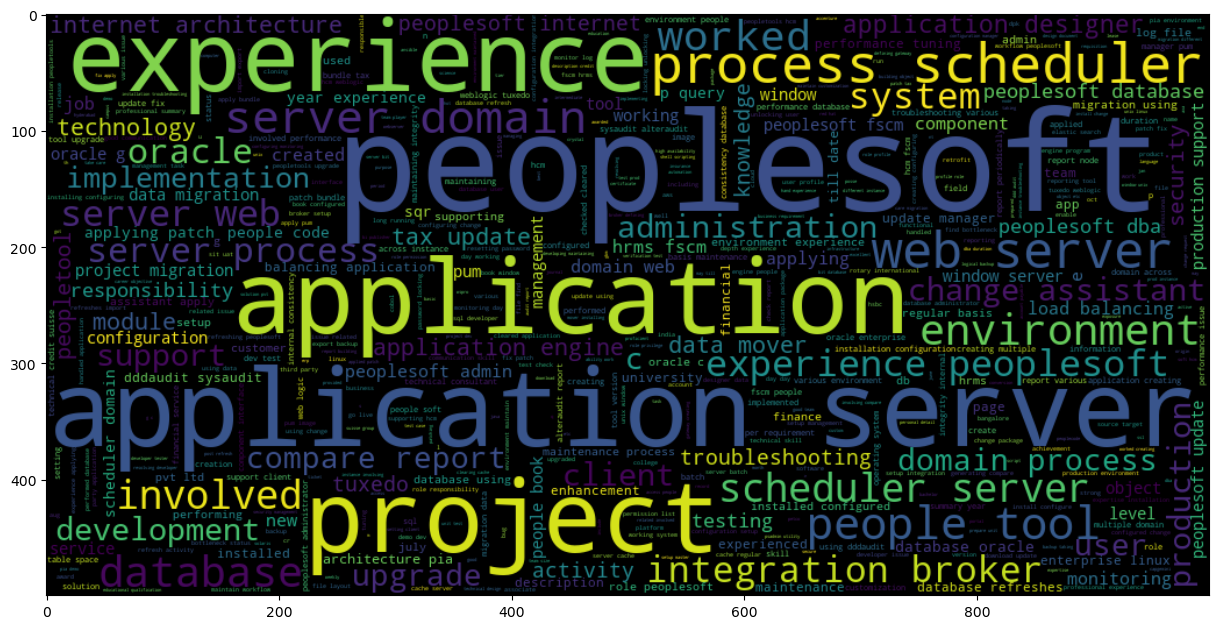

In [32]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
wc= WordCloud(max_words= 500, width= 1000, height= 500, stopwords= STOPWORDS).generate(" ".join(df[df.category == 'Peoplesoft resumes'].resume))
plt.imshow(wc, interpolation= 'bilinear')

### 2. WordCloud for workday resumes

In [33]:
df.category.value_counts()

category
React Developer       24
Workday resumes       21
Peoplesoft resumes    20
SQL Developer         14
Name: count, dtype: int64

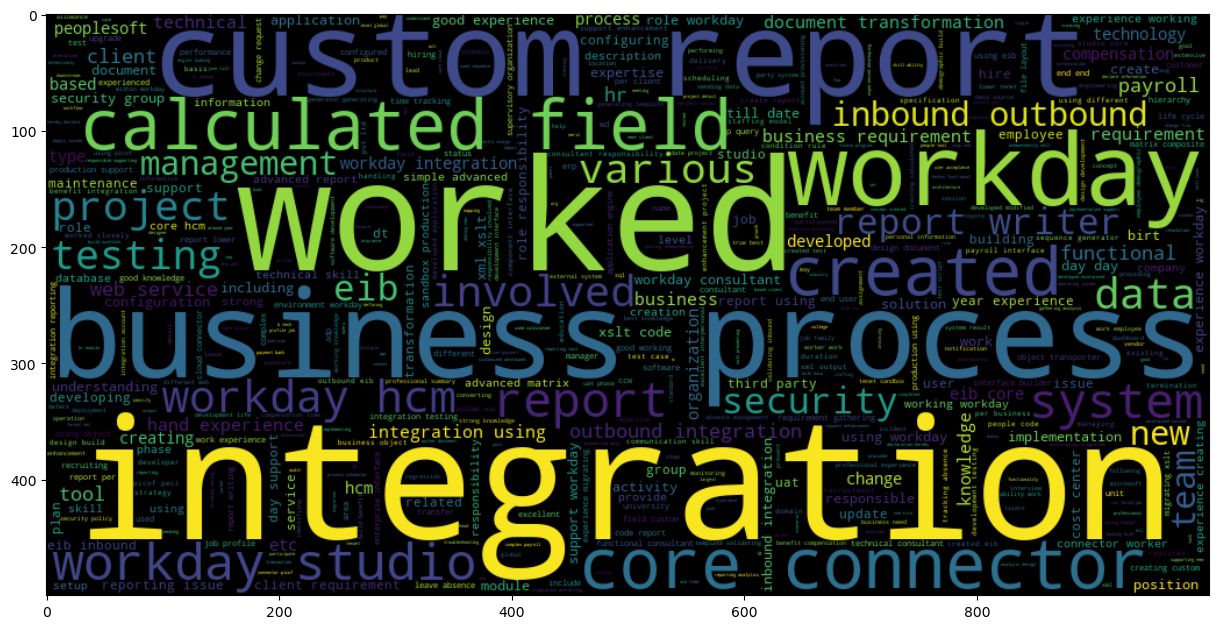

In [34]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
wc= WordCloud(max_words= 500, width= 1000, height= 500, stopwords= STOPWORDS).generate(" ".join(df[df.category == 'Workday resumes'].resume))
plt.imshow(wc, interpolation= 'bilinear')

### 3. WordCloud for React Developer resumes

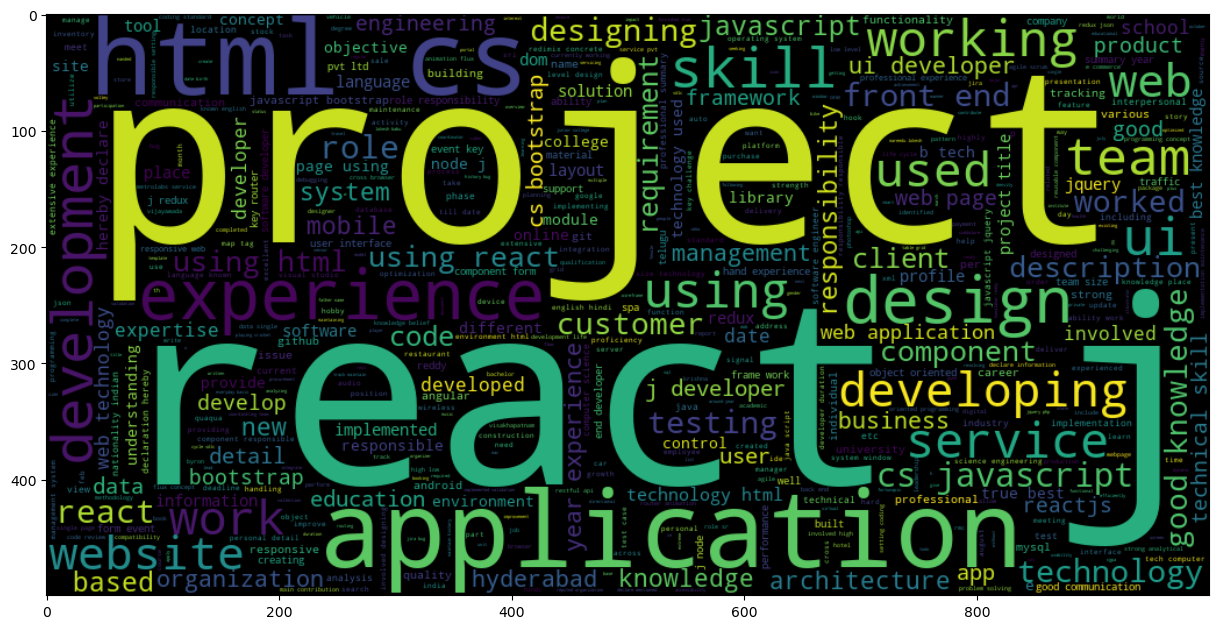

In [35]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
wc= WordCloud(max_words= 500, width= 1000, height= 500, stopwords= STOPWORDS).generate(" ".join(df[df.category == 'React Developer'].resume))
plt.imshow(wc, interpolation= 'bilinear')

### 4. WordCloud for SQL Developer Lightning insight resumes

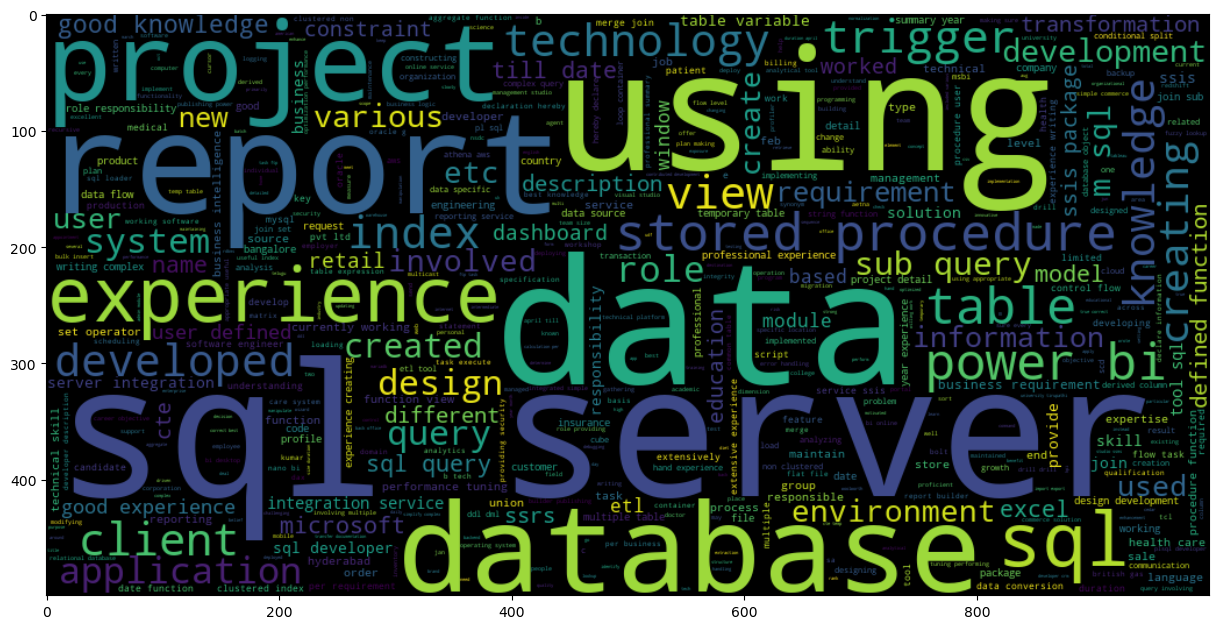

In [36]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
wc= WordCloud(max_words= 500, width= 1000, height= 500, stopwords= STOPWORDS).generate(" ".join(df[df.category == 'SQL Developer'].resume))
plt.imshow(wc, interpolation= 'bilinear')

### 5. Number of words in each category of resumes

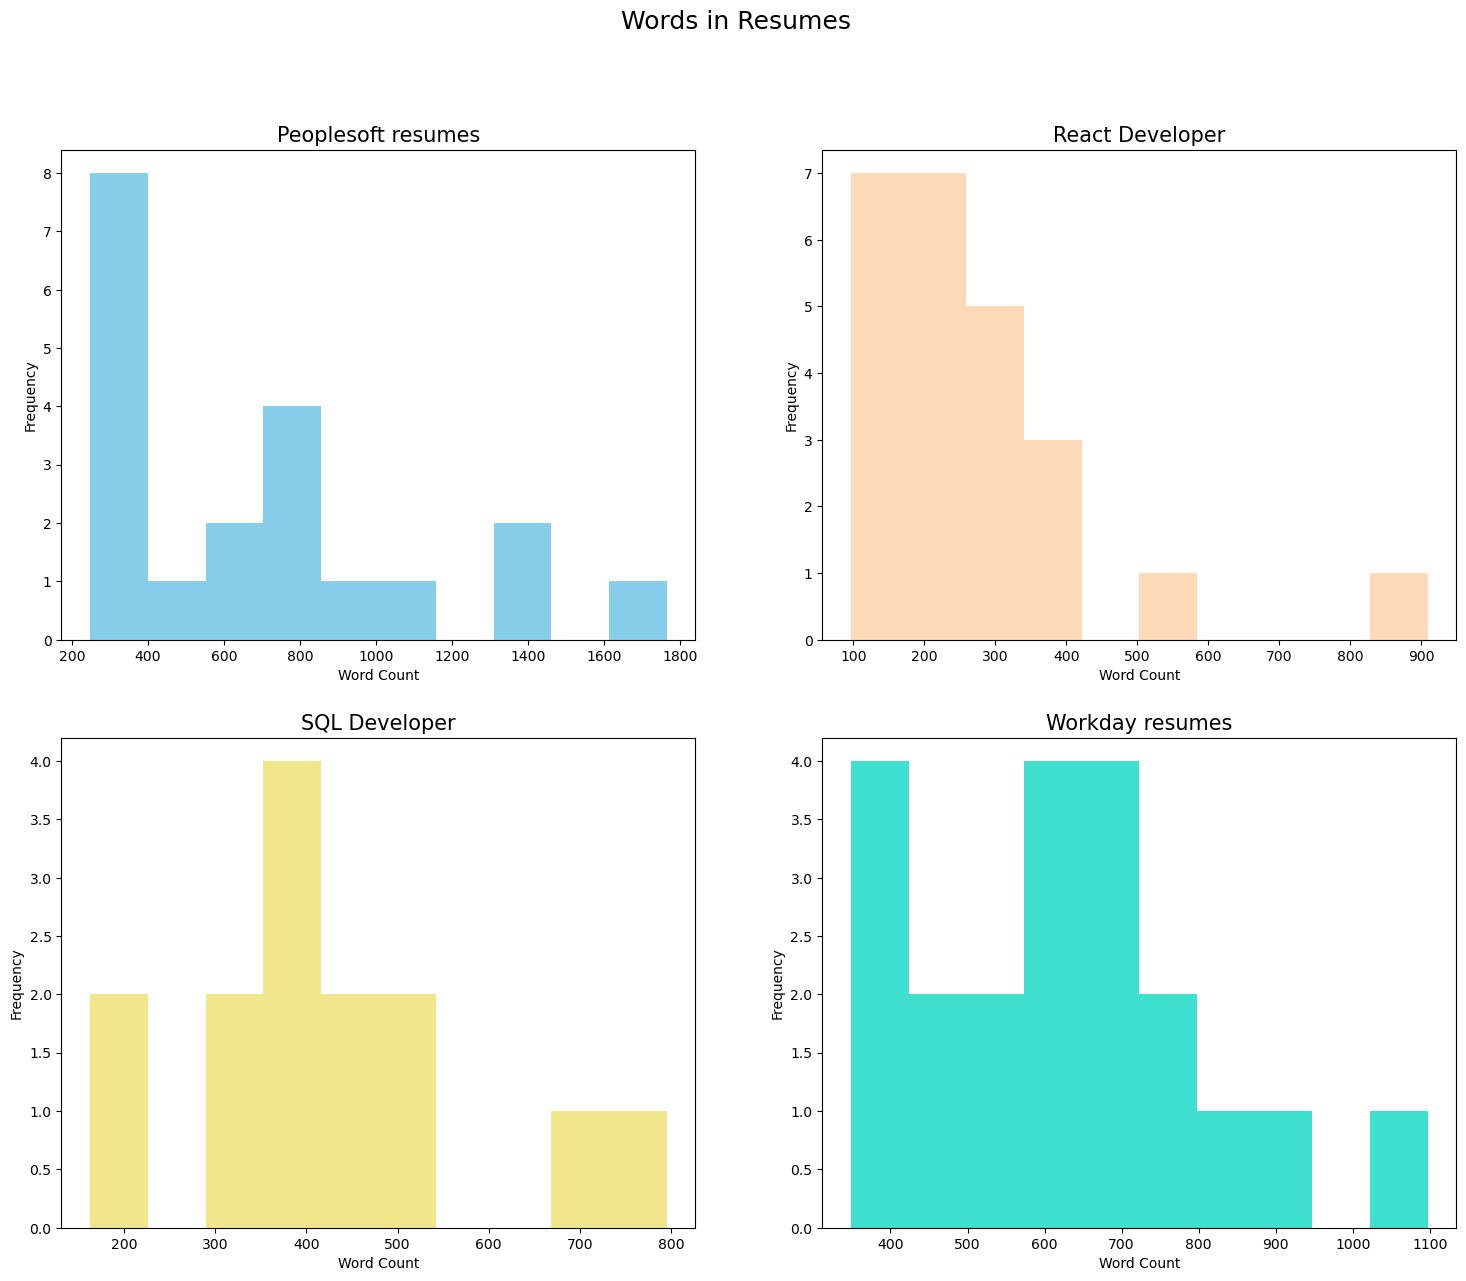

In [37]:
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2, figsize= (18,14))

resume_len= df[df['category']== 'Peoplesoft resumes']['resume'].str.split().map(lambda x: len(x))
ax1.hist(resume_len, color= 'SkyBlue')
ax1.set_title('Peoplesoft resumes', fontsize= 15)
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')

resume_len= df[df['category']== 'React Developer']['resume'].str.split().map(lambda x: len(x))
ax2.hist(resume_len, color= 'PeachPuff')
ax2.set_title('React Developer', fontsize= 15)
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')

resume_len= df[df['category']== 'SQL Developer']['resume'].str.split().map(lambda x: len(x))
ax3.hist(resume_len, color= 'khaki')
ax3.set_title('SQL Developer', fontsize= 15)
ax3.set_xlabel('Word Count')
ax3.set_ylabel('Frequency')

resume_len= df[df['category']== 'Workday resumes']['resume'].str.split().map(lambda x: len(x))
ax4.hist(resume_len, color= 'turquoise')
ax4.set_title('Workday resumes', fontsize= 15)
ax4.set_xlabel('Word Count')
ax4.set_ylabel('Frequency')

fig.suptitle('Words in Resumes', fontsize= 18)
plt.show()

## 6.	N-Gram Analysis
•	This section involves analyzing the text data by breaking it into N-grams, which are contiguous sequences of N items.

In [38]:
resumes = ' '.join(df['resume'])

In [39]:
string = resumes.split(" ")

In [40]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

### I.	Unigram Analysis
•	Analysis is done on single words (individual tokens) in the resume data.


             word  count
0   (experience,)    580
1  (application,)    507
2       (server,)    488
3       (report,)    466
4   (peoplesoft,)    440


<Axes: xlabel='count', ylabel='word'>

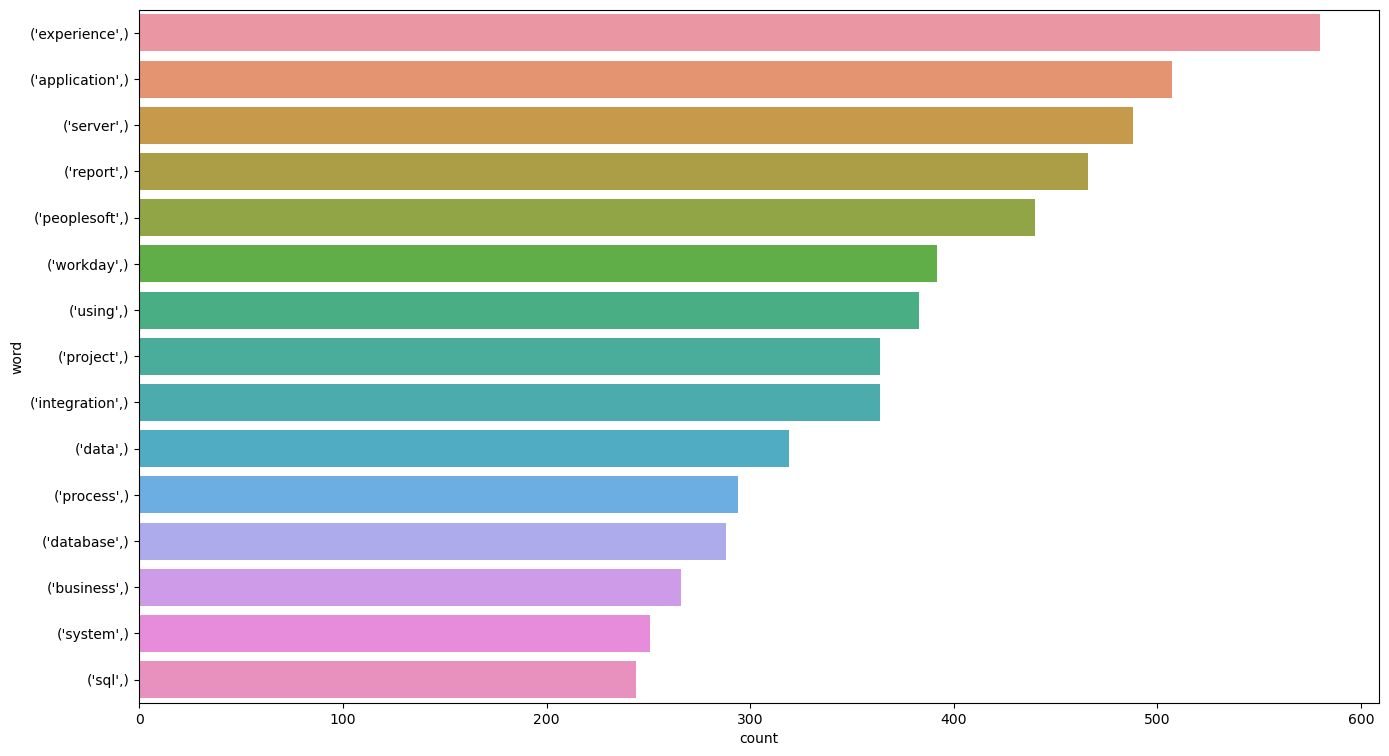

In [41]:
draw_n_gram(string,1)

### II.	Bigram Analysis
•	Analysis is done on pairs of consecutive words in the resume data.


                    word  count
0  (application, server)    122
1   (process, scheduler)    109
2          (sql, server)    105
3          (web, server)     92
4             (react, j)     89


<Axes: xlabel='count', ylabel='word'>

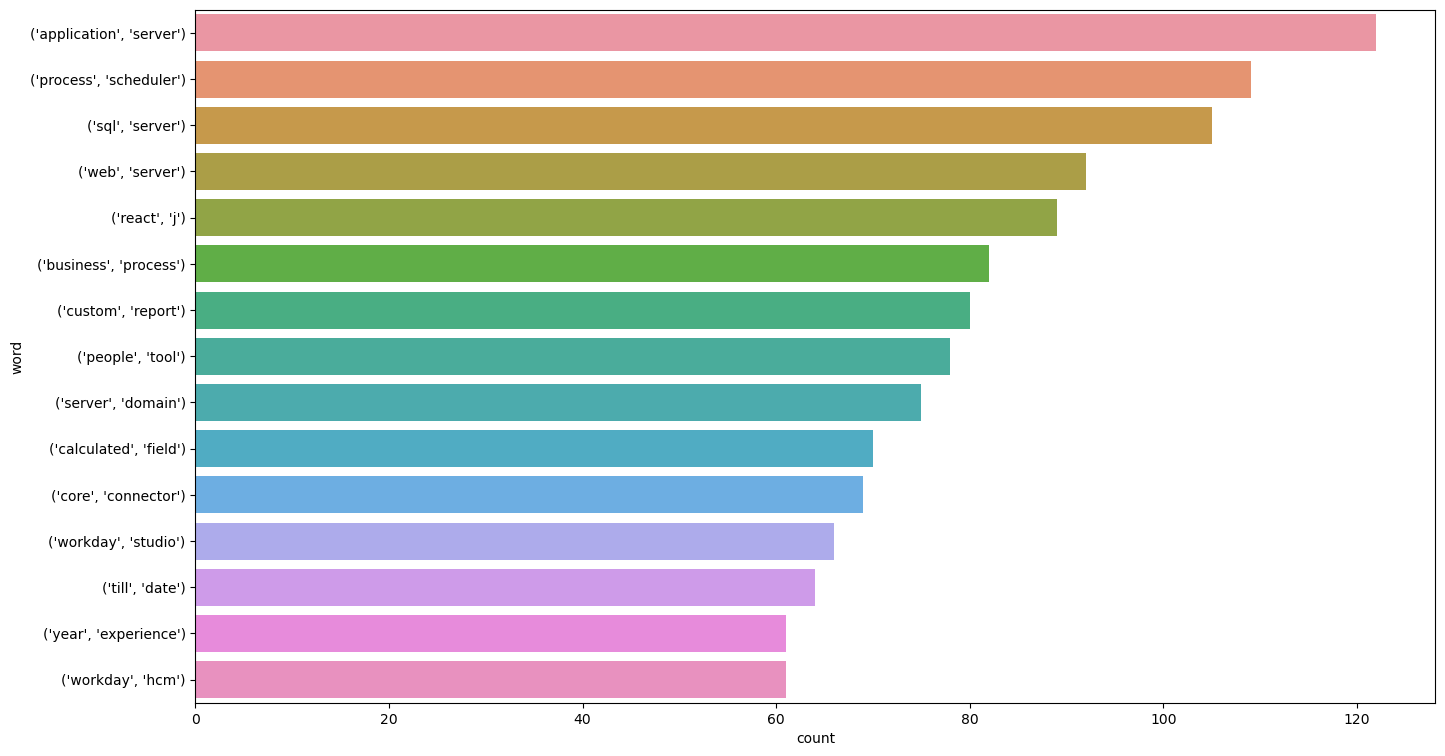

In [42]:
draw_n_gram(string,2)

### III.	Trigram Analysis
•	Analysis is done on triplets of consecutive words in the resume data.

                            word  count
0   (process, scheduler, server)     56
1          (server, web, server)     47
2   (server, process, scheduler)     41
3  (application, server, domain)     37
4     (application, server, web)     37


<Axes: xlabel='count', ylabel='word'>

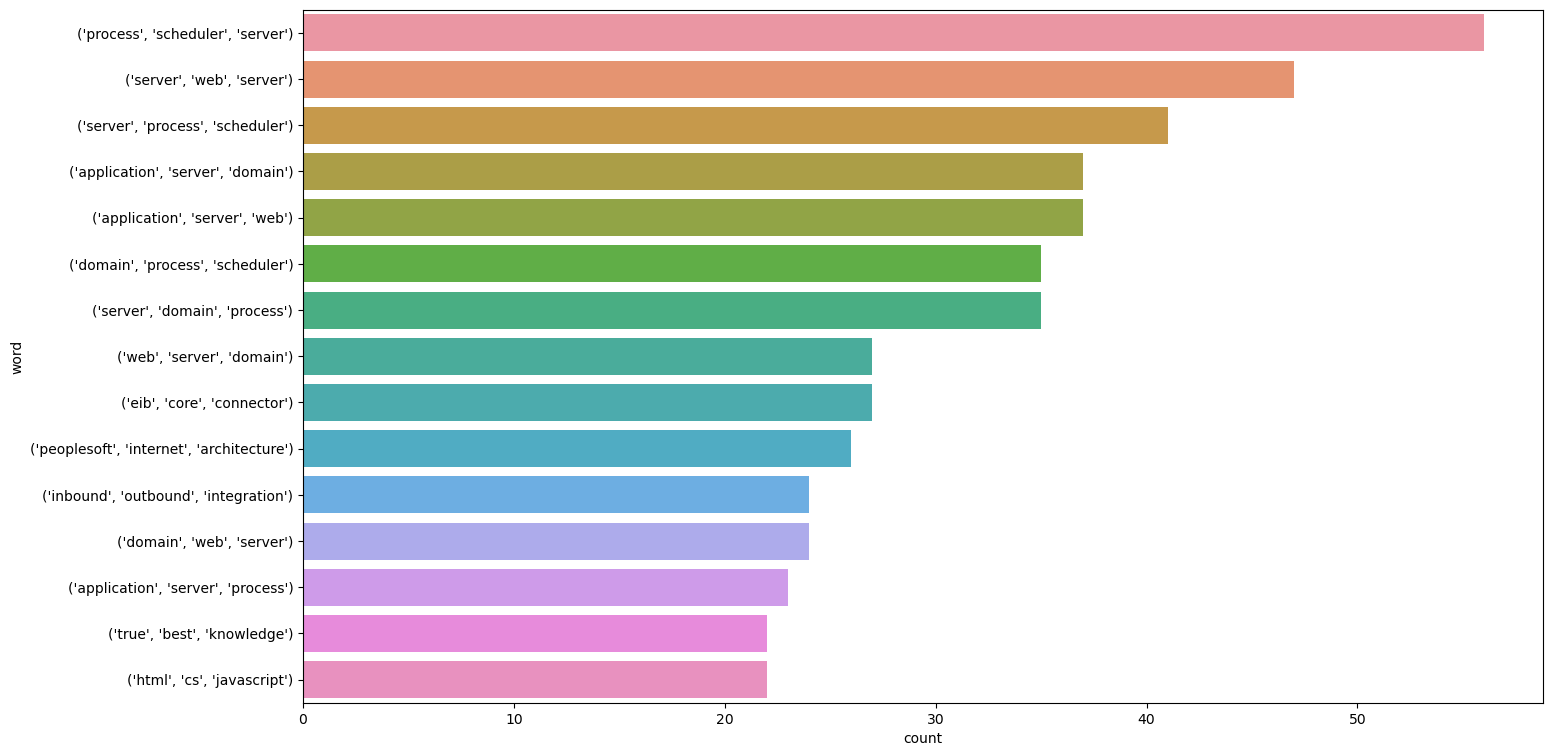

In [43]:
draw_n_gram(string,3)

In [44]:
# Replace text labels with numerical values in the 'category' column
df['category'] = df['category'].replace({
    'Peoplesoft resumes': 0,
    'SQL Developer': 1,
    'Workday resumes': 2,
    'React Developer': 3
})

In [45]:
df

category                                             resume
S/no                                                             
0            3  name ravali p curriculum vitae specialization ...
1            3  susovan bag seeking challenging position field...
2            3  kanumuru deepak reddy career objective secure ...
3            3  haripriya battina experience ui developer reac...
4            3  kamalakar reddy linked http www linkedin com k...
...        ...                                                ...
74           2  workday integration consultant name sri krishn...
75           2  seeking suitable position workday hcm techno f...
76           2  workday hcm fcm name kumar role workday consul...
77           2  venkateswarlu b workday consultant year experi...
78           2  vinay kumar v workday functional consultant ex...

[79 rows x 2 columns]

## 7. Model Building

### Train Test Split

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [47]:
requiredText = df['resume'].values
requiredTarget = df['category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.3,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(55, 3806)
(24, 3806)


In [48]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Creating a dataframe for model performance evaluation

# Create an empty DataFrame
columns = ['Train Accuracy (%)', 'Test Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)']
performance = pd.DataFrame(columns=columns)

# Set 'model_name' as the index
performance.index.name = 'Model Name'

In [49]:
# Define a function to plot confusion matrix as heatmap
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### 1. Logistic Regression model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression Test Accuracy: 1.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



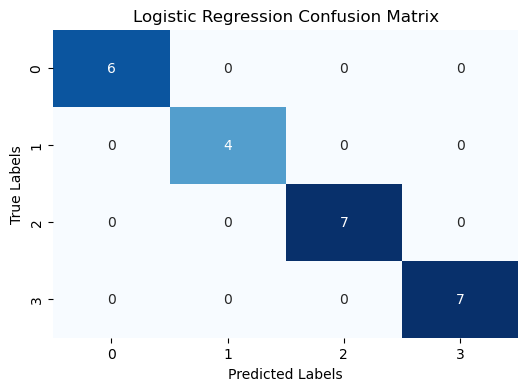

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a smaller parameter space for Logistic Regression
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Initialize RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_dist_lr, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data
random_search_lr.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params_lr = random_search_lr.best_params_
best_lr_model = random_search_lr.best_estimator_

# Predict on the test set using the best model
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Test Accuracy:", accuracy_lr)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression Confusion Matrix')

# Add a row to performance dataframe for a logistic regression model with its metrics
model_name = 'Logistic Regression'
train_accuracy = round(random_search_lr.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_lr, 2) * 100
precision = round(precision_score(y_test,y_pred_lr,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_lr, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_lr, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 2. Random Forest

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



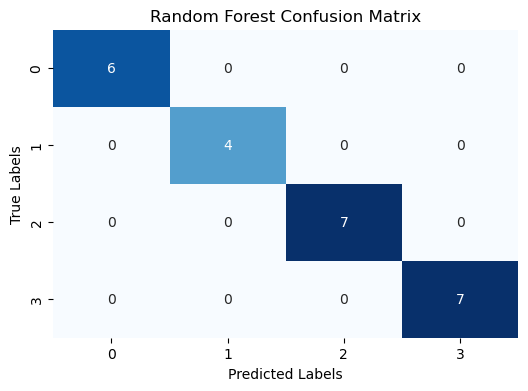

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define an expanded parameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_matrix_rf, 'Random Forest Confusion Matrix')

# Add a row to performance dataframe for a random forest model with its metrics
model_name = 'Random Forest Classifier'
train_accuracy = round(best_rf_model.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_rf, 2)  * 100
precision = round(precision_score(y_test,y_pred_rf,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_rf, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_rf, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 3. SVM

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVM Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



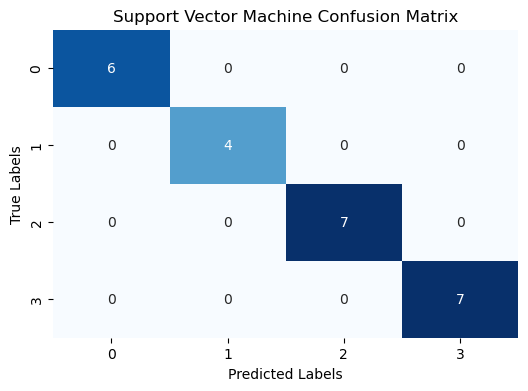

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize the SVM model
svm_model = SVC()

# Define the parameter distributions for random search
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best SVM model from the random search
best_svm_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(conf_matrix_svm, 'Support Vector Machine Confusion Matrix')

# Add a row to performance dataframe for SVM model with its metrics
model_name = 'Support Vector Machine Classifier'
train_accuracy = round(best_svm_model.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_svm, 2) * 100
precision = round(precision_score(y_test,y_pred_svm,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_svm, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_svm, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 4. Neural Network model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Neural Network Test Accuracy: 1.0
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



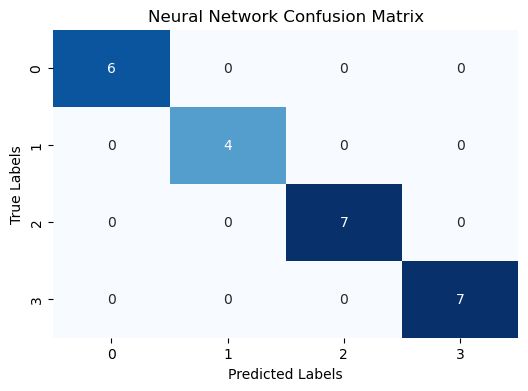

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter space for Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Initialize the Neural Network model
nn_model = MLPClassifier()

# Initialize RandomizedSearchCV for Neural Network
random_search_nn = RandomizedSearchCV(nn_model, param_distributions=param_dist_nn, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the full training data
random_search_nn.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params_nn = random_search_nn.best_params_
best_nn_model = random_search_nn.best_estimator_

# Predict on the test set using the best model
y_pred_nn = best_nn_model.predict(X_test)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Test Accuracy:", accuracy_nn)

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plot_confusion_matrix(conf_matrix_nn, 'Neural Network Confusion Matrix')

# Add a row to performance dataframe for neural network model with its metrics
model_name = 'Multi-Layer Perceptron Classifier'
train_accuracy = round(best_nn_model.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_nn, 2) * 100
precision = round(precision_score(y_test,y_pred_nn,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_nn, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_nn, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 5. Multinomial Naive Bayes

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Naive Bayes Test Accuracy: 1.0
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



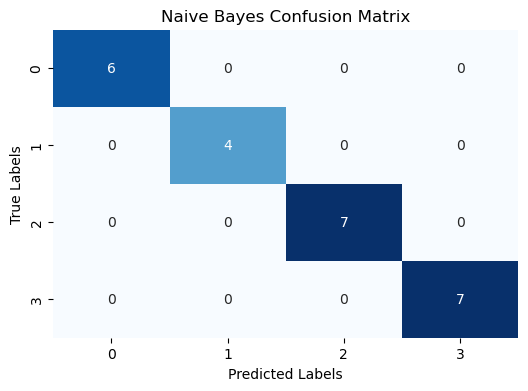

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define hyperparameter distributions for Naive Bayes
nb_param_dist = {
    'alpha': [0.1, 1.0, 10.0]
}

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Create a RandomizedSearchCV object for hyperparameter tuning
random_search_nb = RandomizedSearchCV(nb_classifier, param_distributions=nb_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the full training data
random_search_nb.fit(X_train, y_train)

# Get the best Naive Bayes classifier from the random search
best_nb_classifier = random_search_nb.best_estimator_

# Predictions using the best estimator
nb_y_pred = best_nb_classifier.predict(X_test)

# Calculate accuracy
nb_test_accuracy = accuracy_score(y_test, nb_y_pred)
print("Naive Bayes Test Accuracy:", nb_test_accuracy)

# Print classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))

# Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
plot_confusion_matrix(nb_conf_matrix, 'Naive Bayes Confusion Matrix')

# Add a row to performance dataframe for naive bayes model with its metrics
model_name = 'Naive Bayes Classifier'
train_accuracy = round(best_nb_classifier.score(X_train, y_train), 2) * 100
test_accuracy = round(nb_test_accuracy, 2) * 100
precision = round(precision_score(y_test,nb_y_pred,average = 'macro'),2) * 100
recall = round(recall_score(y_test,nb_y_pred, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,nb_y_pred, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 6. Gradient Boosting

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Gradient Boosting Test Accuracy: 1.0
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



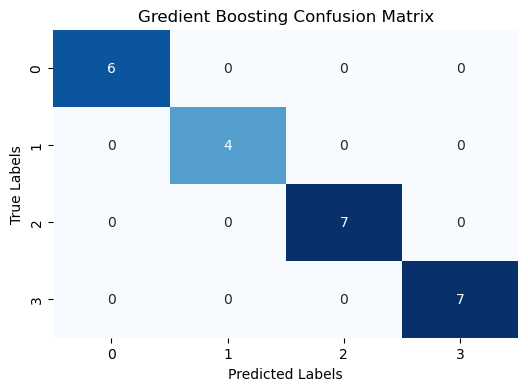

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define hyperparameter distributions for Gradient Boosting
gb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create a RandomizedSearchCV object for hyperparameter tuning
random_search_gb = RandomizedSearchCV(gb_classifier, param_distributions=gb_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the full training data
random_search_gb.fit(X_train, y_train)

# Get the best Gradient Boosting classifier from the random search
best_gb_classifier = random_search_gb.best_estimator_

# Predictions using the best estimator
gb_y_pred = best_gb_classifier.predict(X_test)

# Calculate accuracy
gb_test_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Test Accuracy:", gb_test_accuracy)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))

# Confusion Matrix
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
plot_confusion_matrix(gb_conf_matrix, 'Gredient Boosting Confusion Matrix')

# Add a row to performance dataframe for gradient boosting model with its metrics
model_name = 'Gredient Boosting Classifier'
train_accuracy = round(best_gb_classifier.score(X_train, y_train), 2) * 100
test_accuracy = round(gb_test_accuracy, 2) * 100
precision = round(precision_score(y_test,gb_y_pred,average = 'macro'),2) * 100
recall = round(recall_score(y_test,gb_y_pred, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,gb_y_pred, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 7. Ridge Classifier model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ridge Classifier Test Accuracy: 1.0
Ridge Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



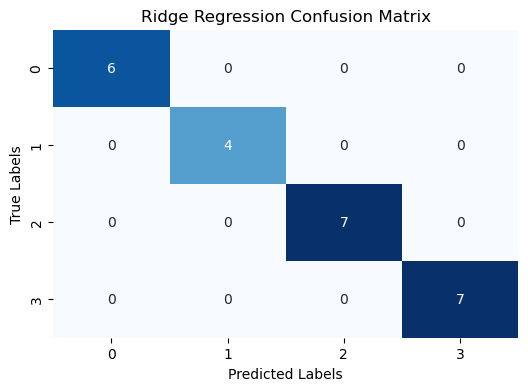

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a smaller parameter space for Ridge Classifier
param_dist_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Initialize the Ridge Classifier model
ridge_model = RidgeClassifier()

# Initialize RandomizedSearchCV for Ridge Classifier
random_search_ridge = RandomizedSearchCV(ridge_model, param_distributions=param_dist_ridge, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the full training data
random_search_ridge.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params_ridge = random_search_ridge.best_params_
best_ridge_model = random_search_ridge.best_estimator_

# Predict on the test set using the best model
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate the Ridge Classifier model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Ridge Classifier Test Accuracy:", accuracy_ridge)

print("Ridge Classifier Classification Report:")
print(classification_report(y_test, y_pred_ridge))

conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
plot_confusion_matrix(conf_matrix_ridge, 'Ridge Regression Confusion Matrix')

# Add a row to performance dataframe for ridge regression classifier model with its metrics
model_name = 'Ridge Regression'
train_accuracy = round(best_ridge_model.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_ridge, 2) * 100
precision = round(precision_score(y_test,y_pred_ridge,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_ridge, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_ridge, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 8. KNN classifier

Cross-Validation Scores: [1.         0.72727273 0.90909091 1.         1.        ]
Mean CV Score: 0.9272727272727274
Standard Deviation of CV Scores: 0.10601730717900545
KNN Test Accuracy: 1.0
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



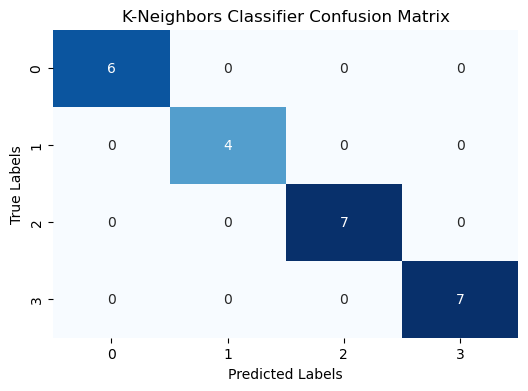

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

# Fit the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy on test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy:", accuracy_knn)

# Classification report
classification_rep = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:")
print(classification_rep)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(conf_matrix_knn, 'K-Neighbors Classifier Confusion Matrix')

# Add a row to performance dataframe for k neighbors classifier model with its metrics
model_name = 'K-Neighbors Classifier'
train_accuracy = round(knn_classifier.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_knn, 2) * 100
precision = round(precision_score(y_test,y_pred_knn,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_knn, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_knn, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 9. CatBoost classifier

Learning rate set to 0.067474
0:	learn: 1.3651830	total: 174ms	remaining: 2m 53s
1:	learn: 1.3347730	total: 205ms	remaining: 1m 42s
2:	learn: 1.3090653	total: 239ms	remaining: 1m 19s
3:	learn: 1.2820698	total: 271ms	remaining: 1m 7s
4:	learn: 1.2456626	total: 301ms	remaining: 59.9s
5:	learn: 1.2014051	total: 331ms	remaining: 54.8s
6:	learn: 1.1718456	total: 362ms	remaining: 51.3s
7:	learn: 1.1423841	total: 395ms	remaining: 48.9s
8:	learn: 1.0822083	total: 416ms	remaining: 45.9s
9:	learn: 1.0558490	total: 452ms	remaining: 44.7s
10:	learn: 1.0342024	total: 483ms	remaining: 43.5s
11:	learn: 1.0035107	total: 513ms	remaining: 42.3s
12:	learn: 0.9770506	total: 545ms	remaining: 41.4s
13:	learn: 0.9604411	total: 575ms	remaining: 40.5s
14:	learn: 0.9377599	total: 605ms	remaining: 39.7s
15:	learn: 0.9141388	total: 639ms	remaining: 39.3s
16:	learn: 0.8857780	total: 670ms	remaining: 38.7s
17:	learn: 0.8715702	total: 698ms	remaining: 38.1s
18:	learn: 0.8589701	total: 728ms	remaining: 37.6s
19:	lear

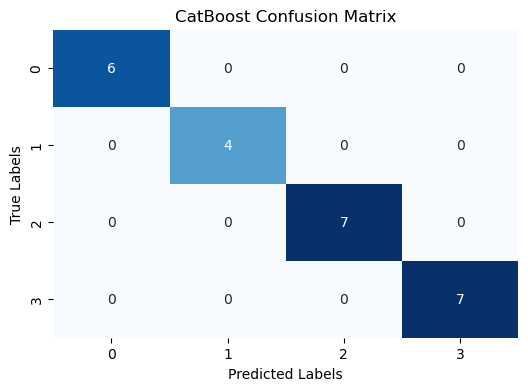

760:	learn: 0.0106830	total: 48.6s	remaining: 15.2s
761:	learn: 0.0106637	total: 48.6s	remaining: 15.2s
762:	learn: 0.0106525	total: 48.7s	remaining: 15.1s
763:	learn: 0.0106321	total: 48.7s	remaining: 15.1s
764:	learn: 0.0106183	total: 48.8s	remaining: 15s
765:	learn: 0.0106034	total: 48.9s	remaining: 14.9s
766:	learn: 0.0105916	total: 49s	remaining: 14.9s
767:	learn: 0.0105810	total: 49s	remaining: 14.8s
768:	learn: 0.0105562	total: 49.1s	remaining: 14.7s
769:	learn: 0.0105354	total: 49.1s	remaining: 14.7s
770:	learn: 0.0105157	total: 49.2s	remaining: 14.6s
771:	learn: 0.0105045	total: 49.3s	remaining: 14.6s
772:	learn: 0.0104809	total: 49.3s	remaining: 14.5s
773:	learn: 0.0104709	total: 49.4s	remaining: 14.4s
774:	learn: 0.0104572	total: 49.5s	remaining: 14.4s
775:	learn: 0.0104462	total: 49.5s	remaining: 14.3s
776:	learn: 0.0104224	total: 49.5s	remaining: 14.2s
777:	learn: 0.0104094	total: 49.6s	remaining: 14.2s
778:	learn: 0.0103996	total: 49.7s	remaining: 14.1s
779:	learn: 0.0103

922:	learn: 0.0086193	total: 58.7s	remaining: 4.9s
923:	learn: 0.0086125	total: 58.8s	remaining: 4.84s
924:	learn: 0.0086013	total: 58.9s	remaining: 4.77s
925:	learn: 0.0085925	total: 58.9s	remaining: 4.71s
926:	learn: 0.0085834	total: 59s	remaining: 4.64s
927:	learn: 0.0085772	total: 59s	remaining: 4.58s
928:	learn: 0.0085674	total: 59.1s	remaining: 4.52s
929:	learn: 0.0085596	total: 59.2s	remaining: 4.45s
930:	learn: 0.0085484	total: 59.2s	remaining: 4.39s
931:	learn: 0.0085368	total: 59.3s	remaining: 4.32s
932:	learn: 0.0085257	total: 59.3s	remaining: 4.26s
933:	learn: 0.0085145	total: 59.4s	remaining: 4.2s
934:	learn: 0.0085065	total: 59.4s	remaining: 4.13s
935:	learn: 0.0084956	total: 59.5s	remaining: 4.07s
936:	learn: 0.0084904	total: 59.6s	remaining: 4s
937:	learn: 0.0084787	total: 59.6s	remaining: 3.94s
938:	learn: 0.0084684	total: 59.7s	remaining: 3.88s
939:	learn: 0.0084589	total: 59.8s	remaining: 3.81s
940:	learn: 0.0084477	total: 59.8s	remaining: 3.75s
941:	learn: 0.0084337

85:	learn: 0.1991115	total: 5.22s	remaining: 55.5s
86:	learn: 0.1940025	total: 5.29s	remaining: 55.5s
87:	learn: 0.1898740	total: 5.36s	remaining: 55.6s
88:	learn: 0.1853298	total: 5.45s	remaining: 55.8s
89:	learn: 0.1818443	total: 5.52s	remaining: 55.8s
90:	learn: 0.1777585	total: 5.6s	remaining: 55.9s
91:	learn: 0.1752421	total: 5.67s	remaining: 56s
92:	learn: 0.1726046	total: 5.73s	remaining: 55.9s
93:	learn: 0.1698491	total: 5.8s	remaining: 55.9s
94:	learn: 0.1672356	total: 5.87s	remaining: 55.9s
95:	learn: 0.1634565	total: 5.95s	remaining: 56.1s
96:	learn: 0.1599677	total: 6.01s	remaining: 56s
97:	learn: 0.1566143	total: 6.07s	remaining: 55.9s
98:	learn: 0.1527936	total: 6.1s	remaining: 55.5s
99:	learn: 0.1491959	total: 6.13s	remaining: 55.2s
100:	learn: 0.1460400	total: 6.19s	remaining: 55.1s
101:	learn: 0.1435282	total: 6.24s	remaining: 55s
102:	learn: 0.1405498	total: 6.3s	remaining: 54.8s
103:	learn: 0.1372723	total: 6.36s	remaining: 54.8s
104:	learn: 0.1352967	total: 6.42s	re

244:	learn: 0.0369214	total: 15.8s	remaining: 48.6s
245:	learn: 0.0367199	total: 15.8s	remaining: 48.6s
246:	learn: 0.0365729	total: 15.9s	remaining: 48.6s
247:	learn: 0.0363631	total: 16s	remaining: 48.5s
248:	learn: 0.0362093	total: 16.1s	remaining: 48.5s
249:	learn: 0.0359880	total: 16.2s	remaining: 48.5s
250:	learn: 0.0357989	total: 16.3s	remaining: 48.5s
251:	learn: 0.0355899	total: 16.3s	remaining: 48.5s
252:	learn: 0.0353629	total: 16.4s	remaining: 48.5s
253:	learn: 0.0351240	total: 16.5s	remaining: 48.4s
254:	learn: 0.0349333	total: 16.6s	remaining: 48.4s
255:	learn: 0.0347617	total: 16.6s	remaining: 48.3s
256:	learn: 0.0345511	total: 16.7s	remaining: 48.4s
257:	learn: 0.0343198	total: 16.8s	remaining: 48.4s
258:	learn: 0.0341826	total: 16.9s	remaining: 48.4s
259:	learn: 0.0340229	total: 17s	remaining: 48.4s
260:	learn: 0.0338651	total: 17.1s	remaining: 48.4s
261:	learn: 0.0336808	total: 17.1s	remaining: 48.3s
262:	learn: 0.0334843	total: 17.2s	remaining: 48.2s
263:	learn: 0.03

406:	learn: 0.0185510	total: 26.4s	remaining: 38.4s
407:	learn: 0.0184958	total: 26.5s	remaining: 38.4s
408:	learn: 0.0184287	total: 26.5s	remaining: 38.3s
409:	learn: 0.0183264	total: 26.6s	remaining: 38.2s
410:	learn: 0.0182842	total: 26.6s	remaining: 38.2s
411:	learn: 0.0182223	total: 26.7s	remaining: 38.1s
412:	learn: 0.0181624	total: 26.7s	remaining: 38s
413:	learn: 0.0181056	total: 26.8s	remaining: 37.9s
414:	learn: 0.0180424	total: 26.9s	remaining: 37.9s
415:	learn: 0.0179977	total: 26.9s	remaining: 37.8s
416:	learn: 0.0179119	total: 27s	remaining: 37.7s
417:	learn: 0.0178689	total: 27s	remaining: 37.6s
418:	learn: 0.0178103	total: 27.1s	remaining: 37.6s
419:	learn: 0.0177661	total: 27.2s	remaining: 37.5s
420:	learn: 0.0176968	total: 27.2s	remaining: 37.4s
421:	learn: 0.0176469	total: 27.3s	remaining: 37.4s
422:	learn: 0.0176053	total: 27.3s	remaining: 37.3s
423:	learn: 0.0175721	total: 27.4s	remaining: 37.2s
424:	learn: 0.0175168	total: 27.4s	remaining: 37.1s
425:	learn: 0.0174

565:	learn: 0.0123536	total: 35.9s	remaining: 27.5s
566:	learn: 0.0123202	total: 35.9s	remaining: 27.4s
567:	learn: 0.0122952	total: 36s	remaining: 27.4s
568:	learn: 0.0122737	total: 36s	remaining: 27.3s
569:	learn: 0.0122547	total: 36.1s	remaining: 27.2s
570:	learn: 0.0122336	total: 36.1s	remaining: 27.2s
571:	learn: 0.0121992	total: 36.2s	remaining: 27.1s
572:	learn: 0.0121851	total: 36.2s	remaining: 27s
573:	learn: 0.0121567	total: 36.3s	remaining: 26.9s
574:	learn: 0.0121388	total: 36.4s	remaining: 26.9s
575:	learn: 0.0121132	total: 36.4s	remaining: 26.8s
576:	learn: 0.0120876	total: 36.4s	remaining: 26.7s
577:	learn: 0.0120419	total: 36.5s	remaining: 26.6s
578:	learn: 0.0120222	total: 36.5s	remaining: 26.6s
579:	learn: 0.0119891	total: 36.6s	remaining: 26.5s
580:	learn: 0.0119674	total: 36.6s	remaining: 26.4s
581:	learn: 0.0119473	total: 36.7s	remaining: 26.3s
582:	learn: 0.0119183	total: 36.7s	remaining: 26.3s
583:	learn: 0.0118951	total: 36.8s	remaining: 26.2s
584:	learn: 0.0118

726:	learn: 0.0091390	total: 45.4s	remaining: 17.1s
727:	learn: 0.0091233	total: 45.5s	remaining: 17s
728:	learn: 0.0091127	total: 45.5s	remaining: 16.9s
729:	learn: 0.0090999	total: 45.6s	remaining: 16.9s
730:	learn: 0.0090886	total: 45.6s	remaining: 16.8s
731:	learn: 0.0090758	total: 45.7s	remaining: 16.7s
732:	learn: 0.0090496	total: 45.8s	remaining: 16.7s
733:	learn: 0.0090264	total: 45.8s	remaining: 16.6s
734:	learn: 0.0090079	total: 45.9s	remaining: 16.5s
735:	learn: 0.0089876	total: 45.9s	remaining: 16.5s
736:	learn: 0.0089729	total: 46s	remaining: 16.4s
737:	learn: 0.0089547	total: 46s	remaining: 16.3s
738:	learn: 0.0089424	total: 46.1s	remaining: 16.3s
739:	learn: 0.0089274	total: 46.2s	remaining: 16.2s
740:	learn: 0.0089156	total: 46.2s	remaining: 16.2s
741:	learn: 0.0089012	total: 46.3s	remaining: 16.1s
742:	learn: 0.0088877	total: 46.4s	remaining: 16s
743:	learn: 0.0088694	total: 46.4s	remaining: 16s
744:	learn: 0.0088551	total: 46.5s	remaining: 15.9s
745:	learn: 0.0088333	

885:	learn: 0.0072787	total: 54.4s	remaining: 7s
886:	learn: 0.0072710	total: 54.5s	remaining: 6.94s
887:	learn: 0.0072625	total: 54.6s	remaining: 6.88s
888:	learn: 0.0072548	total: 54.6s	remaining: 6.82s
889:	learn: 0.0072491	total: 54.7s	remaining: 6.76s
890:	learn: 0.0072398	total: 54.8s	remaining: 6.7s
891:	learn: 0.0072282	total: 54.8s	remaining: 6.64s
892:	learn: 0.0072228	total: 54.9s	remaining: 6.58s
893:	learn: 0.0072141	total: 55s	remaining: 6.52s
894:	learn: 0.0072036	total: 55s	remaining: 6.46s
895:	learn: 0.0071970	total: 55.1s	remaining: 6.4s
896:	learn: 0.0071850	total: 55.2s	remaining: 6.34s
897:	learn: 0.0071745	total: 55.3s	remaining: 6.28s
898:	learn: 0.0071655	total: 55.4s	remaining: 6.22s
899:	learn: 0.0071552	total: 55.5s	remaining: 6.16s
900:	learn: 0.0071445	total: 55.5s	remaining: 6.1s
901:	learn: 0.0071368	total: 55.6s	remaining: 6.04s
902:	learn: 0.0071289	total: 55.7s	remaining: 5.98s
903:	learn: 0.0071180	total: 55.8s	remaining: 5.92s
904:	learn: 0.0071104	

46:	learn: 0.4949564	total: 2.92s	remaining: 59.2s
47:	learn: 0.4850083	total: 2.99s	remaining: 59.2s
48:	learn: 0.4728063	total: 3.05s	remaining: 59.2s
49:	learn: 0.4586832	total: 3.11s	remaining: 59.1s
50:	learn: 0.4505650	total: 3.18s	remaining: 59.1s
51:	learn: 0.4394186	total: 3.24s	remaining: 59s
52:	learn: 0.4299335	total: 3.29s	remaining: 58.8s
53:	learn: 0.4217469	total: 3.35s	remaining: 58.8s
54:	learn: 0.4105769	total: 3.42s	remaining: 58.8s
55:	learn: 0.3994679	total: 3.48s	remaining: 58.6s
56:	learn: 0.3922716	total: 3.54s	remaining: 58.6s
57:	learn: 0.3819572	total: 3.62s	remaining: 58.8s
58:	learn: 0.3748192	total: 3.7s	remaining: 59s
59:	learn: 0.3691264	total: 3.78s	remaining: 59.3s
60:	learn: 0.3629059	total: 3.87s	remaining: 59.5s
61:	learn: 0.3555994	total: 3.97s	remaining: 1m
62:	learn: 0.3455613	total: 4.05s	remaining: 1m
63:	learn: 0.3373971	total: 4.14s	remaining: 1m
64:	learn: 0.3298387	total: 4.24s	remaining: 1m
65:	learn: 0.3237141	total: 4.31s	remaining: 1m


208:	learn: 0.0528856	total: 13.2s	remaining: 49.8s
209:	learn: 0.0525016	total: 13.2s	remaining: 49.7s
210:	learn: 0.0521802	total: 13.3s	remaining: 49.7s
211:	learn: 0.0518646	total: 13.4s	remaining: 49.6s
212:	learn: 0.0516536	total: 13.4s	remaining: 49.6s
213:	learn: 0.0512404	total: 13.5s	remaining: 49.5s
214:	learn: 0.0509382	total: 13.5s	remaining: 49.4s
215:	learn: 0.0505743	total: 13.6s	remaining: 49.3s
216:	learn: 0.0501696	total: 13.6s	remaining: 49.2s
217:	learn: 0.0496884	total: 13.7s	remaining: 49s
218:	learn: 0.0492530	total: 13.7s	remaining: 48.9s
219:	learn: 0.0489655	total: 13.8s	remaining: 48.8s
220:	learn: 0.0485677	total: 13.8s	remaining: 48.7s
221:	learn: 0.0483195	total: 13.9s	remaining: 48.6s
222:	learn: 0.0478790	total: 13.9s	remaining: 48.4s
223:	learn: 0.0475725	total: 13.9s	remaining: 48.3s
224:	learn: 0.0472887	total: 14s	remaining: 48.2s
225:	learn: 0.0470114	total: 14.1s	remaining: 48.1s
226:	learn: 0.0468248	total: 14.2s	remaining: 48.2s
227:	learn: 0.04

370:	learn: 0.0242256	total: 22.9s	remaining: 38.8s
371:	learn: 0.0241290	total: 22.9s	remaining: 38.7s
372:	learn: 0.0240468	total: 23s	remaining: 38.6s
373:	learn: 0.0239583	total: 23s	remaining: 38.6s
374:	learn: 0.0238749	total: 23.1s	remaining: 38.5s
375:	learn: 0.0238044	total: 23.2s	remaining: 38.4s
376:	learn: 0.0237331	total: 23.2s	remaining: 38.4s
377:	learn: 0.0236073	total: 23.3s	remaining: 38.3s
378:	learn: 0.0235543	total: 23.3s	remaining: 38.2s
379:	learn: 0.0234786	total: 23.4s	remaining: 38.2s
380:	learn: 0.0233524	total: 23.4s	remaining: 38.1s
381:	learn: 0.0232806	total: 23.5s	remaining: 38s
382:	learn: 0.0232140	total: 23.5s	remaining: 37.9s
383:	learn: 0.0231428	total: 23.6s	remaining: 37.8s
384:	learn: 0.0230601	total: 23.7s	remaining: 37.8s
385:	learn: 0.0229707	total: 23.7s	remaining: 37.7s
386:	learn: 0.0228646	total: 23.7s	remaining: 37.6s
387:	learn: 0.0227739	total: 23.8s	remaining: 37.5s
388:	learn: 0.0227236	total: 23.9s	remaining: 37.5s
389:	learn: 0.0226

529:	learn: 0.0150180	total: 33.2s	remaining: 29.5s
530:	learn: 0.0149753	total: 33.3s	remaining: 29.4s
531:	learn: 0.0149155	total: 33.3s	remaining: 29.3s
532:	learn: 0.0148848	total: 33.4s	remaining: 29.3s
533:	learn: 0.0148377	total: 33.5s	remaining: 29.2s
534:	learn: 0.0148098	total: 33.6s	remaining: 29.2s
535:	learn: 0.0147911	total: 33.7s	remaining: 29.1s
536:	learn: 0.0147495	total: 33.7s	remaining: 29.1s
537:	learn: 0.0147276	total: 33.8s	remaining: 29s
538:	learn: 0.0146858	total: 33.9s	remaining: 29s
539:	learn: 0.0146508	total: 34s	remaining: 28.9s
540:	learn: 0.0146341	total: 34s	remaining: 28.9s
541:	learn: 0.0146069	total: 34.1s	remaining: 28.8s
542:	learn: 0.0145733	total: 34.2s	remaining: 28.8s
543:	learn: 0.0145507	total: 34.3s	remaining: 28.7s
544:	learn: 0.0145305	total: 34.4s	remaining: 28.7s
545:	learn: 0.0144897	total: 34.4s	remaining: 28.6s
546:	learn: 0.0144578	total: 34.5s	remaining: 28.6s
547:	learn: 0.0144334	total: 34.5s	remaining: 28.5s
548:	learn: 0.014400

690:	learn: 0.0107075	total: 42.8s	remaining: 19.2s
691:	learn: 0.0106928	total: 42.9s	remaining: 19.1s
692:	learn: 0.0106760	total: 43s	remaining: 19s
693:	learn: 0.0106634	total: 43s	remaining: 19s
694:	learn: 0.0106383	total: 43.1s	remaining: 18.9s
695:	learn: 0.0106162	total: 43.1s	remaining: 18.8s
696:	learn: 0.0106025	total: 43.2s	remaining: 18.8s
697:	learn: 0.0105866	total: 43.2s	remaining: 18.7s
698:	learn: 0.0105551	total: 43.2s	remaining: 18.6s
699:	learn: 0.0105407	total: 43.3s	remaining: 18.6s
700:	learn: 0.0105262	total: 43.4s	remaining: 18.5s
701:	learn: 0.0105149	total: 43.4s	remaining: 18.4s
702:	learn: 0.0104966	total: 43.5s	remaining: 18.4s
703:	learn: 0.0104803	total: 43.5s	remaining: 18.3s
704:	learn: 0.0104645	total: 43.6s	remaining: 18.2s
705:	learn: 0.0104503	total: 43.6s	remaining: 18.2s
706:	learn: 0.0104355	total: 43.7s	remaining: 18.1s
707:	learn: 0.0104162	total: 43.8s	remaining: 18s
708:	learn: 0.0104047	total: 43.8s	remaining: 18s
709:	learn: 0.0103863	to

849:	learn: 0.0083500	total: 51.6s	remaining: 9.1s
850:	learn: 0.0083417	total: 51.6s	remaining: 9.04s
851:	learn: 0.0083284	total: 51.7s	remaining: 8.97s
852:	learn: 0.0083190	total: 51.7s	remaining: 8.91s
853:	learn: 0.0083095	total: 51.8s	remaining: 8.85s
854:	learn: 0.0082994	total: 51.8s	remaining: 8.79s
855:	learn: 0.0082829	total: 51.9s	remaining: 8.73s
856:	learn: 0.0082728	total: 51.9s	remaining: 8.67s
857:	learn: 0.0082633	total: 52s	remaining: 8.61s
858:	learn: 0.0082502	total: 52.1s	remaining: 8.55s
859:	learn: 0.0082395	total: 52.1s	remaining: 8.49s
860:	learn: 0.0082329	total: 52.2s	remaining: 8.43s
861:	learn: 0.0082233	total: 52.3s	remaining: 8.37s
862:	learn: 0.0082115	total: 52.3s	remaining: 8.3s
863:	learn: 0.0081986	total: 52.3s	remaining: 8.24s
864:	learn: 0.0081878	total: 52.4s	remaining: 8.18s
865:	learn: 0.0081760	total: 52.5s	remaining: 8.12s
866:	learn: 0.0081604	total: 52.5s	remaining: 8.06s
867:	learn: 0.0081523	total: 52.6s	remaining: 8s
868:	learn: 0.00814

10:	learn: 1.0604487	total: 712ms	remaining: 1m 4s
11:	learn: 1.0262862	total: 801ms	remaining: 1m 5s
12:	learn: 0.9964804	total: 881ms	remaining: 1m 6s
13:	learn: 0.9669748	total: 953ms	remaining: 1m 7s
14:	learn: 0.9425965	total: 1.02s	remaining: 1m 6s
15:	learn: 0.9221912	total: 1.08s	remaining: 1m 6s
16:	learn: 0.9037882	total: 1.15s	remaining: 1m 6s
17:	learn: 0.8839413	total: 1.21s	remaining: 1m 6s
18:	learn: 0.8618735	total: 1.27s	remaining: 1m 5s
19:	learn: 0.8374472	total: 1.33s	remaining: 1m 5s
20:	learn: 0.8252093	total: 1.37s	remaining: 1m 3s
21:	learn: 0.8038632	total: 1.43s	remaining: 1m 3s
22:	learn: 0.7918697	total: 1.5s	remaining: 1m 3s
23:	learn: 0.7736683	total: 1.57s	remaining: 1m 3s
24:	learn: 0.7550753	total: 1.64s	remaining: 1m 4s
25:	learn: 0.7421839	total: 1.72s	remaining: 1m 4s
26:	learn: 0.7291946	total: 1.79s	remaining: 1m 4s
27:	learn: 0.7146617	total: 1.87s	remaining: 1m 4s
28:	learn: 0.7039202	total: 1.94s	remaining: 1m 4s
29:	learn: 0.6868814	total: 2s	r

173:	learn: 0.0672148	total: 11.8s	remaining: 55.9s
174:	learn: 0.0668102	total: 11.8s	remaining: 55.8s
175:	learn: 0.0662667	total: 11.9s	remaining: 55.8s
176:	learn: 0.0655293	total: 12s	remaining: 55.7s
177:	learn: 0.0649097	total: 12s	remaining: 55.6s
178:	learn: 0.0644441	total: 12.1s	remaining: 55.6s
179:	learn: 0.0639831	total: 12.2s	remaining: 55.6s
180:	learn: 0.0636341	total: 12.3s	remaining: 55.6s
181:	learn: 0.0629888	total: 12.3s	remaining: 55.5s
182:	learn: 0.0625300	total: 12.4s	remaining: 55.4s
183:	learn: 0.0620870	total: 12.5s	remaining: 55.3s
184:	learn: 0.0615380	total: 12.5s	remaining: 55.3s
185:	learn: 0.0610719	total: 12.6s	remaining: 55.2s
186:	learn: 0.0605589	total: 12.7s	remaining: 55.1s
187:	learn: 0.0602214	total: 12.8s	remaining: 55.1s
188:	learn: 0.0597894	total: 12.9s	remaining: 55.1s
189:	learn: 0.0594903	total: 12.9s	remaining: 55.1s
190:	learn: 0.0589078	total: 13s	remaining: 55.1s
191:	learn: 0.0584259	total: 13.1s	remaining: 55.2s
192:	learn: 0.0579

333:	learn: 0.0280511	total: 24.4s	remaining: 48.6s
334:	learn: 0.0279480	total: 24.4s	remaining: 48.5s
335:	learn: 0.0278615	total: 24.5s	remaining: 48.5s
336:	learn: 0.0277419	total: 24.6s	remaining: 48.5s
337:	learn: 0.0276723	total: 24.7s	remaining: 48.4s
338:	learn: 0.0275843	total: 24.8s	remaining: 48.4s
339:	learn: 0.0274913	total: 24.9s	remaining: 48.3s
340:	learn: 0.0273882	total: 25s	remaining: 48.3s
341:	learn: 0.0272979	total: 25.1s	remaining: 48.3s
342:	learn: 0.0272274	total: 25.2s	remaining: 48.3s
343:	learn: 0.0271666	total: 25.3s	remaining: 48.2s
344:	learn: 0.0270664	total: 25.4s	remaining: 48.1s
345:	learn: 0.0269795	total: 25.5s	remaining: 48.1s
346:	learn: 0.0269022	total: 25.6s	remaining: 48.3s
347:	learn: 0.0268447	total: 25.7s	remaining: 48.2s
348:	learn: 0.0267717	total: 25.8s	remaining: 48.1s
349:	learn: 0.0266915	total: 25.9s	remaining: 48.1s
350:	learn: 0.0266018	total: 26s	remaining: 48s
351:	learn: 0.0265071	total: 26s	remaining: 47.9s
352:	learn: 0.026400

493:	learn: 0.0175220	total: 35.2s	remaining: 36.1s
494:	learn: 0.0174928	total: 35.3s	remaining: 36s
495:	learn: 0.0174396	total: 35.3s	remaining: 35.9s
496:	learn: 0.0173808	total: 35.4s	remaining: 35.8s
497:	learn: 0.0173481	total: 35.5s	remaining: 35.8s
498:	learn: 0.0173182	total: 35.6s	remaining: 35.7s
499:	learn: 0.0172725	total: 35.6s	remaining: 35.6s
500:	learn: 0.0172301	total: 35.7s	remaining: 35.5s
501:	learn: 0.0171905	total: 35.7s	remaining: 35.5s
502:	learn: 0.0171614	total: 35.8s	remaining: 35.4s
503:	learn: 0.0171200	total: 35.9s	remaining: 35.3s
504:	learn: 0.0170823	total: 35.9s	remaining: 35.2s
505:	learn: 0.0170386	total: 36s	remaining: 35.1s
506:	learn: 0.0169910	total: 36s	remaining: 35s
507:	learn: 0.0169528	total: 36.1s	remaining: 35s
508:	learn: 0.0169253	total: 36.2s	remaining: 34.9s
509:	learn: 0.0168839	total: 36.2s	remaining: 34.8s
510:	learn: 0.0168329	total: 36.3s	remaining: 34.7s
511:	learn: 0.0167891	total: 36.3s	remaining: 34.6s
512:	learn: 0.0167547	

655:	learn: 0.0126707	total: 45.9s	remaining: 24.1s
656:	learn: 0.0126501	total: 45.9s	remaining: 24s
657:	learn: 0.0126184	total: 46s	remaining: 23.9s
658:	learn: 0.0125920	total: 46.1s	remaining: 23.8s
659:	learn: 0.0125778	total: 46.1s	remaining: 23.8s
660:	learn: 0.0125349	total: 46.2s	remaining: 23.7s
661:	learn: 0.0125185	total: 46.2s	remaining: 23.6s
662:	learn: 0.0124973	total: 46.3s	remaining: 23.5s
663:	learn: 0.0124788	total: 46.4s	remaining: 23.5s
664:	learn: 0.0124589	total: 46.4s	remaining: 23.4s
665:	learn: 0.0124311	total: 46.5s	remaining: 23.3s
666:	learn: 0.0124076	total: 46.5s	remaining: 23.2s
667:	learn: 0.0123841	total: 46.6s	remaining: 23.2s
668:	learn: 0.0123612	total: 46.6s	remaining: 23.1s
669:	learn: 0.0123366	total: 46.7s	remaining: 23s
670:	learn: 0.0123141	total: 46.8s	remaining: 22.9s
671:	learn: 0.0122940	total: 46.8s	remaining: 22.9s
672:	learn: 0.0122760	total: 46.9s	remaining: 22.8s
673:	learn: 0.0122501	total: 46.9s	remaining: 22.7s
674:	learn: 0.0122

815:	learn: 0.0099322	total: 55.9s	remaining: 12.6s
816:	learn: 0.0099208	total: 56s	remaining: 12.5s
817:	learn: 0.0099106	total: 56.1s	remaining: 12.5s
818:	learn: 0.0098977	total: 56.1s	remaining: 12.4s
819:	learn: 0.0098867	total: 56.2s	remaining: 12.3s
820:	learn: 0.0098748	total: 56.3s	remaining: 12.3s
821:	learn: 0.0098628	total: 56.3s	remaining: 12.2s
822:	learn: 0.0098536	total: 56.4s	remaining: 12.1s
823:	learn: 0.0098426	total: 56.5s	remaining: 12.1s
824:	learn: 0.0098329	total: 56.5s	remaining: 12s
825:	learn: 0.0098190	total: 56.6s	remaining: 11.9s
826:	learn: 0.0098039	total: 56.6s	remaining: 11.8s
827:	learn: 0.0097908	total: 56.7s	remaining: 11.8s
828:	learn: 0.0097748	total: 56.7s	remaining: 11.7s
829:	learn: 0.0097662	total: 56.8s	remaining: 11.6s
830:	learn: 0.0097555	total: 56.9s	remaining: 11.6s
831:	learn: 0.0097418	total: 56.9s	remaining: 11.5s
832:	learn: 0.0097280	total: 57s	remaining: 11.4s
833:	learn: 0.0097114	total: 57s	remaining: 11.3s
834:	learn: 0.009704

978:	learn: 0.0081255	total: 1m 6s	remaining: 1.43s
979:	learn: 0.0081169	total: 1m 6s	remaining: 1.36s
980:	learn: 0.0081070	total: 1m 6s	remaining: 1.29s
981:	learn: 0.0080959	total: 1m 6s	remaining: 1.23s
982:	learn: 0.0080896	total: 1m 6s	remaining: 1.16s
983:	learn: 0.0080781	total: 1m 6s	remaining: 1.09s
984:	learn: 0.0080696	total: 1m 7s	remaining: 1.02s
985:	learn: 0.0080631	total: 1m 7s	remaining: 953ms
986:	learn: 0.0080573	total: 1m 7s	remaining: 885ms
987:	learn: 0.0080487	total: 1m 7s	remaining: 817ms
988:	learn: 0.0080409	total: 1m 7s	remaining: 749ms
989:	learn: 0.0080321	total: 1m 7s	remaining: 681ms
990:	learn: 0.0080218	total: 1m 7s	remaining: 613ms
991:	learn: 0.0080156	total: 1m 7s	remaining: 545ms
992:	learn: 0.0080042	total: 1m 7s	remaining: 477ms
993:	learn: 0.0079971	total: 1m 7s	remaining: 409ms
994:	learn: 0.0079899	total: 1m 7s	remaining: 341ms
995:	learn: 0.0079829	total: 1m 7s	remaining: 272ms
996:	learn: 0.0079716	total: 1m 7s	remaining: 204ms
997:	learn: 

132:	learn: 0.0839930	total: 12.7s	remaining: 1m 23s
133:	learn: 0.0833377	total: 12.8s	remaining: 1m 22s
134:	learn: 0.0826758	total: 12.9s	remaining: 1m 22s
135:	learn: 0.0820635	total: 13s	remaining: 1m 22s
136:	learn: 0.0809895	total: 13.1s	remaining: 1m 22s
137:	learn: 0.0799401	total: 13.2s	remaining: 1m 22s
138:	learn: 0.0793484	total: 13.2s	remaining: 1m 22s
139:	learn: 0.0782941	total: 13.3s	remaining: 1m 21s
140:	learn: 0.0776061	total: 13.4s	remaining: 1m 21s
141:	learn: 0.0768103	total: 13.5s	remaining: 1m 21s
142:	learn: 0.0763779	total: 13.6s	remaining: 1m 21s
143:	learn: 0.0755386	total: 13.6s	remaining: 1m 20s
144:	learn: 0.0746228	total: 13.7s	remaining: 1m 20s
145:	learn: 0.0742724	total: 13.8s	remaining: 1m 20s
146:	learn: 0.0733386	total: 13.8s	remaining: 1m 20s
147:	learn: 0.0726508	total: 13.9s	remaining: 1m 20s
148:	learn: 0.0720657	total: 14s	remaining: 1m 19s
149:	learn: 0.0711991	total: 14.1s	remaining: 1m 19s
150:	learn: 0.0704961	total: 14.1s	remaining: 1m 1

291:	learn: 0.0303286	total: 25.1s	remaining: 1m
292:	learn: 0.0301905	total: 25.2s	remaining: 1m
293:	learn: 0.0300854	total: 25.3s	remaining: 1m
294:	learn: 0.0299038	total: 25.4s	remaining: 1m
295:	learn: 0.0297783	total: 25.5s	remaining: 1m
296:	learn: 0.0296204	total: 25.5s	remaining: 1m
297:	learn: 0.0294303	total: 25.6s	remaining: 1m
298:	learn: 0.0293030	total: 25.7s	remaining: 1m
299:	learn: 0.0292104	total: 25.8s	remaining: 1m
300:	learn: 0.0290883	total: 25.8s	remaining: 1m
301:	learn: 0.0290049	total: 25.9s	remaining: 59.9s
302:	learn: 0.0288997	total: 26s	remaining: 59.8s
303:	learn: 0.0287377	total: 26.1s	remaining: 59.7s
304:	learn: 0.0286250	total: 26.1s	remaining: 59.6s
305:	learn: 0.0284747	total: 26.2s	remaining: 59.4s
306:	learn: 0.0282912	total: 26.3s	remaining: 59.3s
307:	learn: 0.0281471	total: 26.4s	remaining: 59.2s
308:	learn: 0.0280505	total: 26.4s	remaining: 59.1s
309:	learn: 0.0278734	total: 26.5s	remaining: 59s
310:	learn: 0.0277598	total: 26.6s	remaining: 

453:	learn: 0.0173108	total: 37.4s	remaining: 45s
454:	learn: 0.0172629	total: 37.5s	remaining: 44.9s
455:	learn: 0.0172184	total: 37.6s	remaining: 44.8s
456:	learn: 0.0171585	total: 37.6s	remaining: 44.7s
457:	learn: 0.0171277	total: 37.7s	remaining: 44.6s
458:	learn: 0.0170675	total: 37.8s	remaining: 44.5s
459:	learn: 0.0170261	total: 37.8s	remaining: 44.4s
460:	learn: 0.0169758	total: 37.9s	remaining: 44.3s
461:	learn: 0.0169403	total: 38s	remaining: 44.2s
462:	learn: 0.0168957	total: 38.1s	remaining: 44.1s
463:	learn: 0.0168450	total: 38.1s	remaining: 44s
464:	learn: 0.0168116	total: 38.2s	remaining: 43.9s
465:	learn: 0.0167630	total: 38.3s	remaining: 43.8s
466:	learn: 0.0167265	total: 38.3s	remaining: 43.7s
467:	learn: 0.0166800	total: 38.4s	remaining: 43.6s
468:	learn: 0.0166365	total: 38.5s	remaining: 43.6s
469:	learn: 0.0165997	total: 38.5s	remaining: 43.5s
470:	learn: 0.0165628	total: 38.6s	remaining: 43.4s
471:	learn: 0.0165265	total: 38.7s	remaining: 43.3s
472:	learn: 0.0164

613:	learn: 0.0121405	total: 48.5s	remaining: 30.5s
614:	learn: 0.0121133	total: 48.6s	remaining: 30.4s
615:	learn: 0.0120937	total: 48.6s	remaining: 30.3s
616:	learn: 0.0120569	total: 48.7s	remaining: 30.2s
617:	learn: 0.0120397	total: 48.8s	remaining: 30.2s
618:	learn: 0.0120171	total: 48.9s	remaining: 30.1s
619:	learn: 0.0119928	total: 48.9s	remaining: 30s
620:	learn: 0.0119746	total: 49s	remaining: 29.9s
621:	learn: 0.0119508	total: 49.1s	remaining: 29.8s
622:	learn: 0.0119326	total: 49.1s	remaining: 29.7s
623:	learn: 0.0119087	total: 49.2s	remaining: 29.6s
624:	learn: 0.0118881	total: 49.3s	remaining: 29.6s
625:	learn: 0.0118715	total: 49.3s	remaining: 29.5s
626:	learn: 0.0118444	total: 49.4s	remaining: 29.4s
627:	learn: 0.0118253	total: 49.5s	remaining: 29.3s
628:	learn: 0.0118098	total: 49.5s	remaining: 29.2s
629:	learn: 0.0117950	total: 49.6s	remaining: 29.1s
630:	learn: 0.0117721	total: 49.7s	remaining: 29.1s
631:	learn: 0.0117508	total: 49.8s	remaining: 29s
632:	learn: 0.0117

773:	learn: 0.0093747	total: 1m	remaining: 17.7s
774:	learn: 0.0093635	total: 1m	remaining: 17.6s
775:	learn: 0.0093443	total: 1m	remaining: 17.5s
776:	learn: 0.0093294	total: 1m	remaining: 17.5s
777:	learn: 0.0093155	total: 1m	remaining: 17.4s
778:	learn: 0.0092985	total: 1m 1s	remaining: 17.3s
779:	learn: 0.0092884	total: 1m 1s	remaining: 17.2s
780:	learn: 0.0092736	total: 1m 1s	remaining: 17.2s
781:	learn: 0.0092641	total: 1m 1s	remaining: 17.1s
782:	learn: 0.0092499	total: 1m 1s	remaining: 17s
783:	learn: 0.0092387	total: 1m 1s	remaining: 16.9s
784:	learn: 0.0092219	total: 1m 1s	remaining: 16.8s
785:	learn: 0.0092087	total: 1m 1s	remaining: 16.8s
786:	learn: 0.0091911	total: 1m 1s	remaining: 16.7s
787:	learn: 0.0091768	total: 1m 1s	remaining: 16.6s
788:	learn: 0.0091673	total: 1m 1s	remaining: 16.5s
789:	learn: 0.0091544	total: 1m 1s	remaining: 16.5s
790:	learn: 0.0091398	total: 1m 2s	remaining: 16.4s
791:	learn: 0.0091277	total: 1m 2s	remaining: 16.3s
792:	learn: 0.0091089	total: 

933:	learn: 0.0075499	total: 1m 13s	remaining: 5.2s
934:	learn: 0.0075371	total: 1m 13s	remaining: 5.12s
935:	learn: 0.0075295	total: 1m 13s	remaining: 5.04s
936:	learn: 0.0075194	total: 1m 13s	remaining: 4.96s
937:	learn: 0.0075113	total: 1m 13s	remaining: 4.88s
938:	learn: 0.0075007	total: 1m 13s	remaining: 4.8s
939:	learn: 0.0074935	total: 1m 13s	remaining: 4.72s
940:	learn: 0.0074839	total: 1m 14s	remaining: 4.64s
941:	learn: 0.0074759	total: 1m 14s	remaining: 4.56s
942:	learn: 0.0074647	total: 1m 14s	remaining: 4.48s
943:	learn: 0.0074578	total: 1m 14s	remaining: 4.4s
944:	learn: 0.0074511	total: 1m 14s	remaining: 4.33s
945:	learn: 0.0074447	total: 1m 14s	remaining: 4.25s
946:	learn: 0.0074318	total: 1m 14s	remaining: 4.17s
947:	learn: 0.0074226	total: 1m 14s	remaining: 4.09s
948:	learn: 0.0074172	total: 1m 14s	remaining: 4.01s
949:	learn: 0.0074110	total: 1m 14s	remaining: 3.93s
950:	learn: 0.0074006	total: 1m 14s	remaining: 3.85s
951:	learn: 0.0073888	total: 1m 14s	remaining: 3.

In [58]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Cross-validation
cv_scores = cross_val_score(catboost_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy Score:", cv_scores.mean())
print("Standard Deviation of CV Accuracy Scores:", cv_scores.std())

# Fit the CatBoost classifier on the training data
catboost_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_catboost = catboost_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("CatBoost Test Accuracy:", accuracy_catboost)

# Classification report
classification_rep = classification_report(y_test, y_pred_catboost)
print("CatBoost Classification Report:")
print(classification_rep)

# Confusion matrix
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
plot_confusion_matrix(conf_matrix_catboost, 'CatBoost Confusion Matrix')

# Add a row to performance dataframe for catboost model with its metrics
model_name = 'CatBoost'
train_accuracy = round(catboost_classifier.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_catboost, 2) * 100
precision = round(precision_score(y_test,y_pred_catboost,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_catboost, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_catboost, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 10. LightGBM classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 44, number of used features: 70
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.145132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

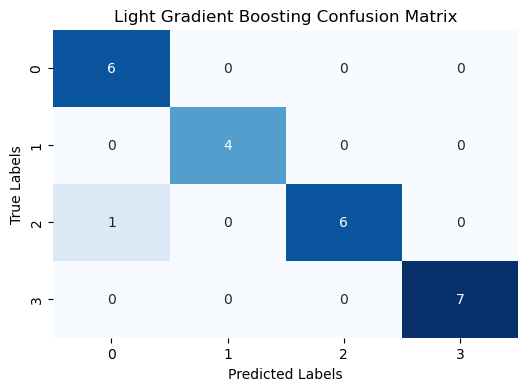

In [59]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Cross-validation
cv_scores = cross_val_score(lgb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy Score:", cv_scores.mean())
print("Standard Deviation of CV Accuracy Scores:", cv_scores.std())

# Fit the LightGBM classifier on the training data
lgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_lgb = lgb_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("LightGBM Test Accuracy:", accuracy_lgb)

# Classification report
classification_rep = classification_report(y_test, y_pred_lgb)
print("LightGBM Classification Report:")
print(classification_rep)

# Confusion matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
plot_confusion_matrix(conf_matrix_lgb, 'Light Gradient Boosting Confusion Matrix')

# Add a row to performance dataframe for light gradient boosting model with its metrics
model_name = 'Light Gradient Boosting'
train_accuracy = round(lgb_classifier.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_lgb, 2) * 100
precision = round(precision_score(y_test,y_pred_lgb,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_lgb, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_lgb, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 11. XGBoost classifier

Cross-Validation Accuracy Scores: [0.90909091 1.         0.90909091 0.90909091 0.90909091]
Mean CV Accuracy Score: 0.9272727272727274
Standard Deviation of CV Accuracy Scores: 0.036363636363636376
XGBoost Test Accuracy: 1.0
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



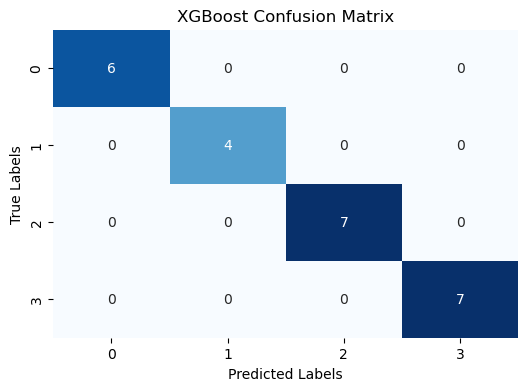

In [60]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Cross-validation
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy Score:", cv_scores.mean())
print("Standard Deviation of CV Accuracy Scores:", cv_scores.std())

# Fit the XGBoost classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Test Accuracy:", accuracy_xgb)

# Classification report
classification_rep = classification_report(y_test, y_pred_xgb)
print("XGBoost Classification Report:")
print(classification_rep)

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_confusion_matrix(conf_matrix_xgb, 'XGBoost Confusion Matrix')

# Add a row to performance dataframe for xgboost model with its metrics
model_name = 'XGBoost'
train_accuracy = round(xgb_classifier.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_xgb, 2) * 100
precision = round(precision_score(y_test,y_pred_xgb,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_xgb, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_xgb, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

### 12. Decision Tree

Cross-Validation Accuracy Scores: [0.90909091 0.72727273 1.         1.         1.        ]
Mean CV Accuracy Score: 0.9272727272727274
Standard Deviation of CV Accuracy Scores: 0.10601730717900545
Decision Tree Test Accuracy: 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



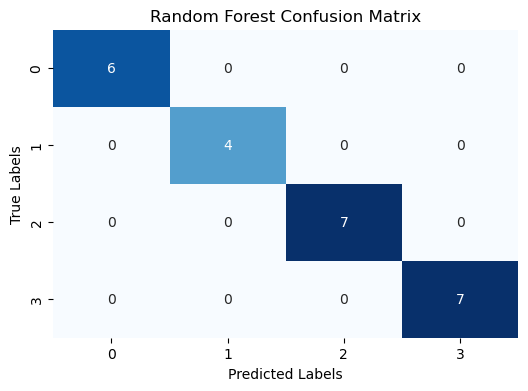

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy Score:", cv_scores.mean())
print("Standard Deviation of CV Accuracy Scores:", cv_scores.std())

# Fit the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy:", accuracy_dt)

# Classification report
classification_rep = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(classification_rep)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(conf_matrix_rf, 'Random Forest Confusion Matrix')

# Add a row to performance dataframe for decision tree model with its metrics
model_name = 'Decision Tree Classifier'
train_accuracy = round(dt_classifier.score(X_train, y_train), 2) * 100
test_accuracy = round(accuracy_dt, 2) * 100
precision = round(precision_score(y_test,y_pred_dt,average = 'macro'),2) * 100
recall = round(recall_score(y_test,y_pred_dt, average = 'macro'),2) * 100
f1 = round(f1_score(y_test,y_pred_dt, average = 'macro'),2) * 100

# Use .loc to add the row
performance.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

## 8.    Model Evaluation

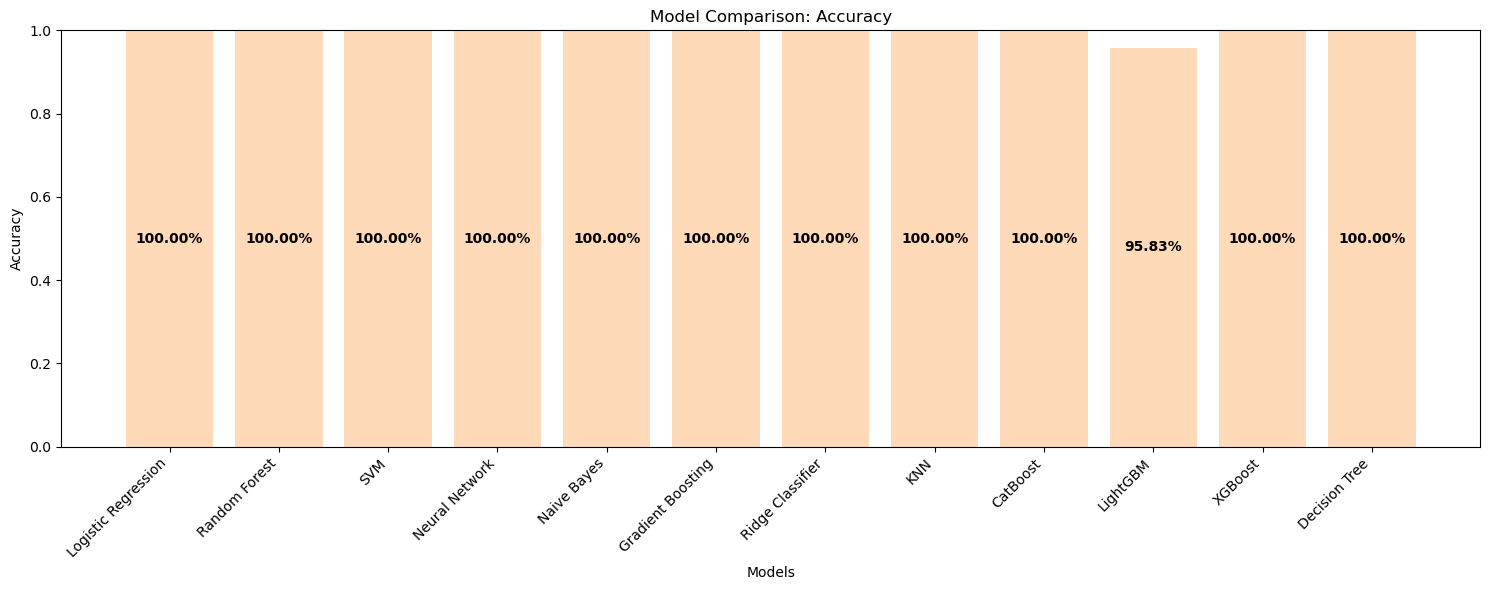

In [62]:
# List of model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network', 'Naive Bayes', 'Gradient Boosting', 'Ridge Classifier', 'KNN', 'CatBoost', 'LightGBM', 'XGBoost', 'Decision Tree']
accuracies = [accuracy_lr, accuracy_rf, accuracy_svm, accuracy_nn,  nb_test_accuracy, gb_test_accuracy, accuracy_ridge, accuracy_knn, accuracy_catboost, accuracy_lgb, accuracy_xgb, accuracy_dt]

# Create a bar plot
plt.figure(figsize=(15, 6))
bars = plt.bar(model_names, accuracies, color='PeachPuff')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure readability

# Display accuracy percentages inside the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{acc:.2%}',
             ha='center', va='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

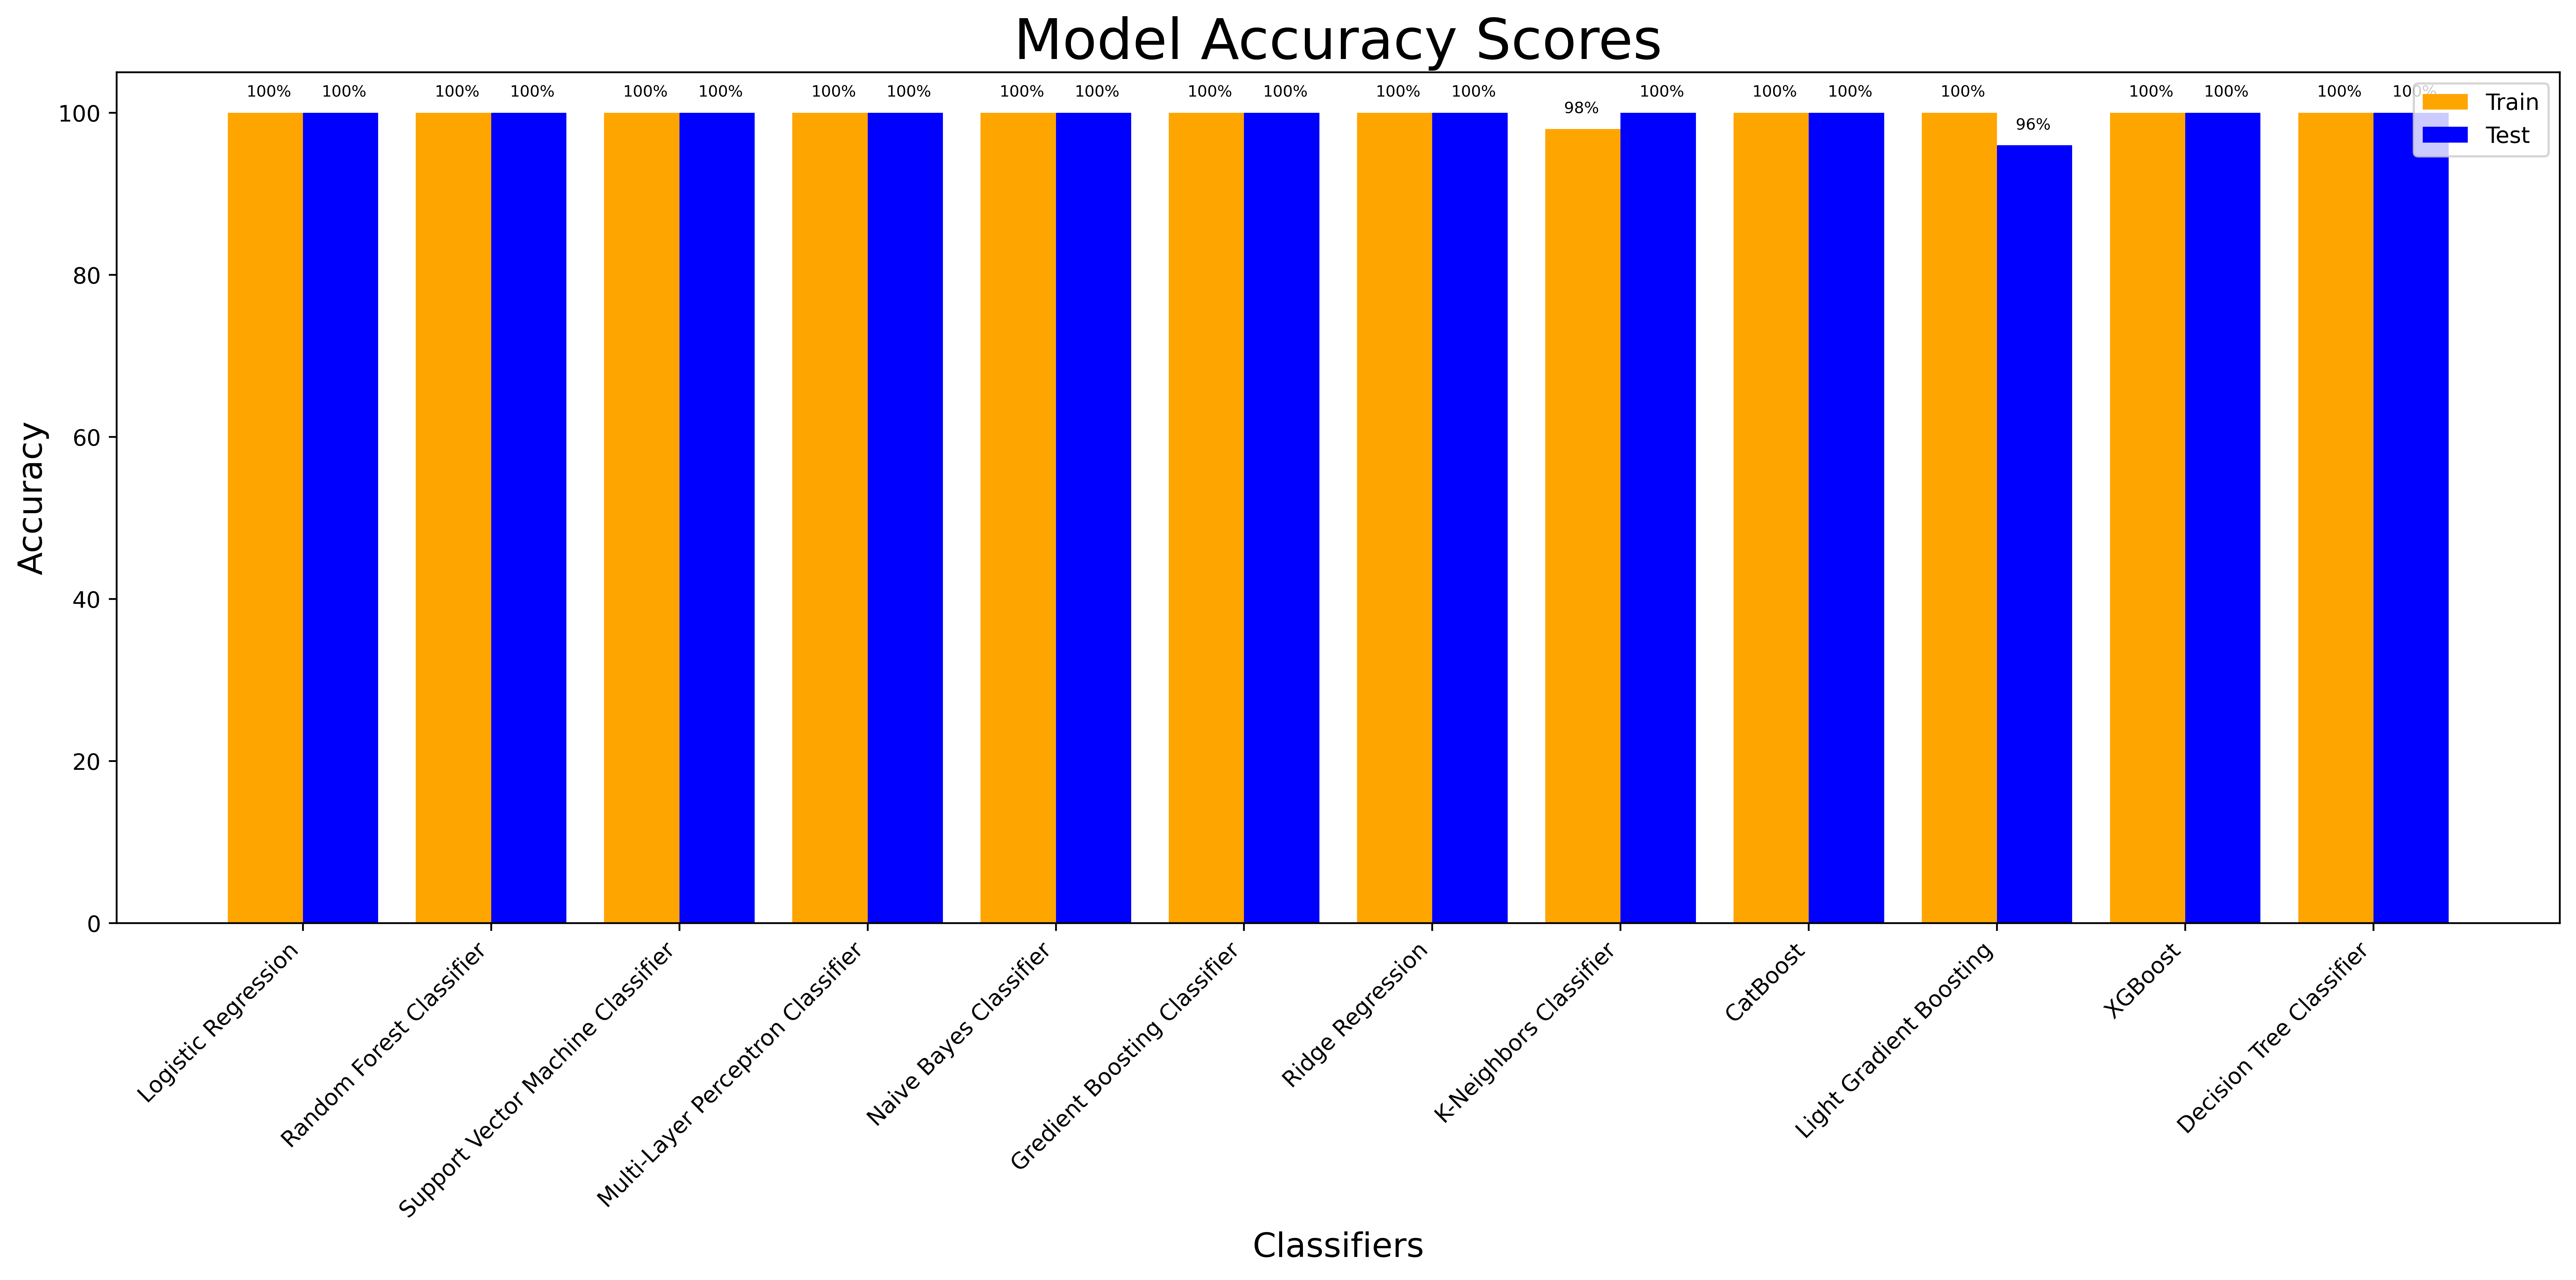

In [63]:
fig, axe = plt.subplots(1,1, figsize=(16,8), dpi=500)
x_pos = np.arange(len(performance))
model_names = performance.index.tolist()

bar1 = plt.bar(x_pos - 0.2, performance['Train Accuracy (%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, performance['Test Accuracy (%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names, size = 10)

plt.xlabel("Classifiers", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("Model Accuracy Scores", size = 25)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = f'{int(performance.iloc[i,0])}%', fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = f'{int(performance.iloc[i,1])}%', fontsize = 7)

plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [64]:
# Performance metrics for each model
performance

Train Accuracy (%)  Test Accuracy (%)  \
Model Name                                                                 
Logistic Regression                             100.0              100.0   
Random Forest Classifier                        100.0              100.0   
Support Vector Machine Classifier               100.0              100.0   
Multi-Layer Perceptron Classifier               100.0              100.0   
Naive Bayes Classifier                          100.0              100.0   
Gredient Boosting Classifier                    100.0              100.0   
Ridge Regression                                100.0              100.0   
K-Neighbors Classifier                           98.0              100.0   
CatBoost                                        100.0              100.0   
Light Gradient Boosting                         100.0               96.0   
XGBoost                                         100.0              100.0   
Decision Tree Classifier                        100.0              100.0   

                                   Precision (%)  Recall (%)  F1 Score (%)  
Model Name                                                                  
Logistic Regression                        100.0       100.0         100.0  
Random Forest Classifier                   100.0       100.0         100.0  
Support Vector Machine Classifier          100.0       100.0         100.0  
Multi-Layer Perceptron Classifier          100.0       100.0         100.0  
Naive Bayes Classifier                     100.0       100.0         100.0  
Gredient Boosting Classifier               100.0       100.0         100.0  
Ridge Regression                           100.0       100.0         100.0  
K-Neighbors Classifier                     100.0       100.0         100.0  
CatBoost                                   100.0       100.0         100.0  
Light Gradient Boosting                     96.0        96.0          96.0  
XGBoost                                    100.0       100.0         100.0  
Decision Tree Classifier                   100.0       100.0         100.0

## 9.   Finalizing Model

Since most classifiers give us perfect accuracy, we have many alternatives to choose from. 

We will go with XGBoost as it 
- usually outperforms other algorithms
- utilizes gradient boosting ensemble techniques
- uses regularization to prevent overfitting
- supports parallel computing

In [65]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
# Fit the XGBoost classifier on the training data
xgb_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred_xgb = xgb_classifier.predict(X_test)
# Calculate accuracy on the test data
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
# Classification report
print(f"XGBoost Classification Report: \n {classification_report(y_test, y_pred_xgb)}")
# Confusion matrix
print(f'XGBoost Confusion Matrix \n {confusion_matrix(y_test, y_pred_xgb)}')

XGBoost Test Accuracy: 1.0
XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

XGBoost Confusion Matrix 
 [[6 0 0 0]
 [0 4 0 0]
 [0 0 7 0]
 [0 0 0 7]]
